In [2]:
import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt
import seaborn as sns
import json

In [9]:
df = pd.read_excel("Data.xlsx", skiprows=5)
df.set_index('date')

PI-Billions of Dollars, Seasonally Adjusted Annual Rate-Personal Income  \
date                                                                                  
2000-04-01                                             8506.8                         
2000-05-01                                             8544.5                         
2000-06-01                                             8597.8                         
2000-07-01                                             8665.3                         
2000-08-01                                             8712.2                         
...                                                       ...                         
2024-12-01                                            25080.6                         
2025-01-01                                            25246.8                         
2025-02-01                                            25441.5                         
2025-03-01                                                NaN                         
2025-04-01                                                NaN                         

            PSAVERT-Percent, Seasonally Adjusted Annual Rate-Personal Saving Rate  \
date                                                                                
2000-04-01                                                4.3                       
2000-05-01                                                4.3                       
2000-06-01                                                4.3                       
2000-07-01                                                4.7                       
2000-08-01                                                4.8                       
...                                                       ...                       
2024-12-01                                                3.3                       
2025-01-01                                                4.3                       
2025-02-01                                                4.6                       
2025-03-01                                                NaN                       
2025-04-01                                                NaN                       

            PCE-Billions of Dollars, Seasonally Adjusted Annual Rate-Personal Consumption Expenditures  \
date                                                                                                     
2000-04-01                                             6679.1                                            
2000-05-01                                             6709.7                                            
2000-06-01                                             6746.9                                            
2000-07-01                                             6768.5                                            
2000-08-01                                             6802.8                                            
...                                                       ...                                            
2024-12-01                                            20408.1                                            
2025-01-01                                            20351.5                                            
2025-02-01                                            20439.3                                            
2025-03-01                                                NaN                                            
2025-04-01                                                NaN                                            

            CPIAUCSL-Index 1982-1984=100, Seasonally Adjusted-Consumer Price Index for All Urban Consumers: All Items in U.S. City Average  \
date                                                                                                                                         
2000-04-01                                            170.900                                                  

In [10]:
def drop_columns_with_high_nan_percentage(df, threshold_percentage):
    if not (0 <= threshold_percentage <= 100):
        raise ValueError("Threshold percentage must be between 0 and 100.")

    total_rows = len(df)
    columns_to_drop = []

    for col in df.columns:
        nan_count = df[col].isnull().sum()
        nan_percentage = (nan_count / total_rows) * 100
        if nan_percentage > threshold_percentage:
            columns_to_drop.append(col)

    df_cleaned = df.drop(columns=columns_to_drop)

    print(f"Dropped {len(columns_to_drop)} columns with NaN percentage > {threshold_percentage}%: {columns_to_drop}")

    return df_cleaned


df_without_nan_cols = drop_columns_with_high_nan_percentage(df.copy(), 5) # Use .copy() to avoid modifying the original DataFrame in place
df_without_nan_cols.shape

Dropped 3 columns with NaN percentage > 5%: ['DTWEXBGS-Index Jan 2006=100, Not Seasonally Adjusted-Nominal Broad U.S. Dollar Index', 'USSLIND-Percent, Seasonally Adjusted-Leading Index for the United States', 'USSLIND-Percent, Seasonally Adjusted-Leading Index for the United States.1']


(301, 43)

In [ ]:
def corr_target(df_input, df_target, corr_coeff=0.95):
	df = pd.DataFrame(df_input)
	df["target"] = pd.Series(df_target)

	corr_matrix = df.corr(method = 'pearson') 
	corr_matrix = corr_matrix.iloc[0:corr_matrix.shape[0]-1,corr_matrix.shape[0]-1]


	corr_matrix = abs(corr_matrix)
	features_drop_list = list(corr_matrix[corr_matrix<corr_coeff].index)

	return features_drop_list

In [ ]:
target_df = 

40


In [ ]:
def plot_univariate(ax, df, feature, target_variable):
    ax.scatter(df[feature], df[target_variable])
    ax.set_xlabel(feature)
    ax.set_ylabel(target_variable)
    ax.set_title(f'Univariate: {feature} vs {target_variable}')
    ax.grid(True)

def plot_bivariate(ax, df, feature, target_variable):
    sns.kdeplot(ax=ax, x=df[feature], y=df[target_variable], fill=True, cmap="viridis", levels=5, alpha=0.5)
    sns.scatterplot(ax=ax, x=df[feature], y=df[target_variable], alpha=0.7, s=15)
    ax.set_xlabel(feature)
    ax.set_ylabel(target_variable)
    ax.set_title(f'Bivariate: {feature} vs {target_variable} (Density)')
    ax.grid(True)

def plot_univariate_and_bivariate_side_by_side(df, target_variable, feature_list):
    if target_variable not in df.columns:
        print(f"Error: Target variable '{target_variable}' not found in the DataFrame.")
        return

    for feature in feature_list:
        if feature in df.columns:
            fig, axes = plt.subplots(1, 2, figsize=(14, 5))  # 1 row, 2 columns of subplots
            fig.suptitle(f'Analysis for Feature: {feature}', fontsize=16)

            # Plot univariate on the first subplot (axes[0])
            plot_univariate(axes[0], df, feature, target_variable)

            # Plot bivariate on the second subplot (axes[1])
            plot_bivariate(axes[1], df, feature, target_variable)

            plt.tight_layout(rect=[0, 0.03, 1, 0.95]) # Adjust layout to make room for suptitle
            plt.show()
        else:
            print(f"Warning: Feature '{feature}' not found in the DataFrame.")

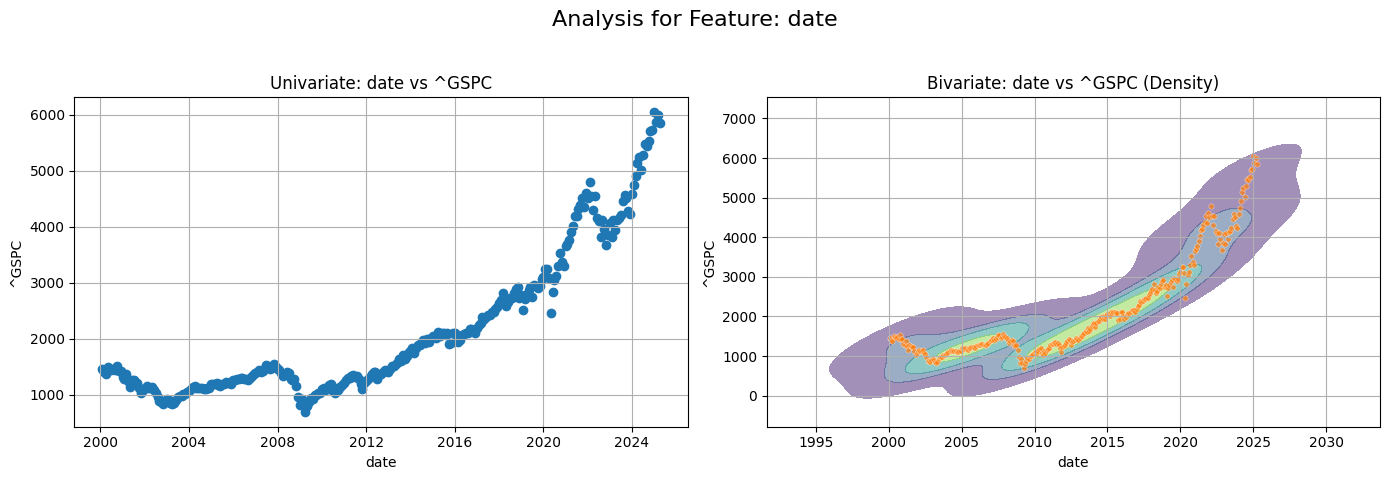

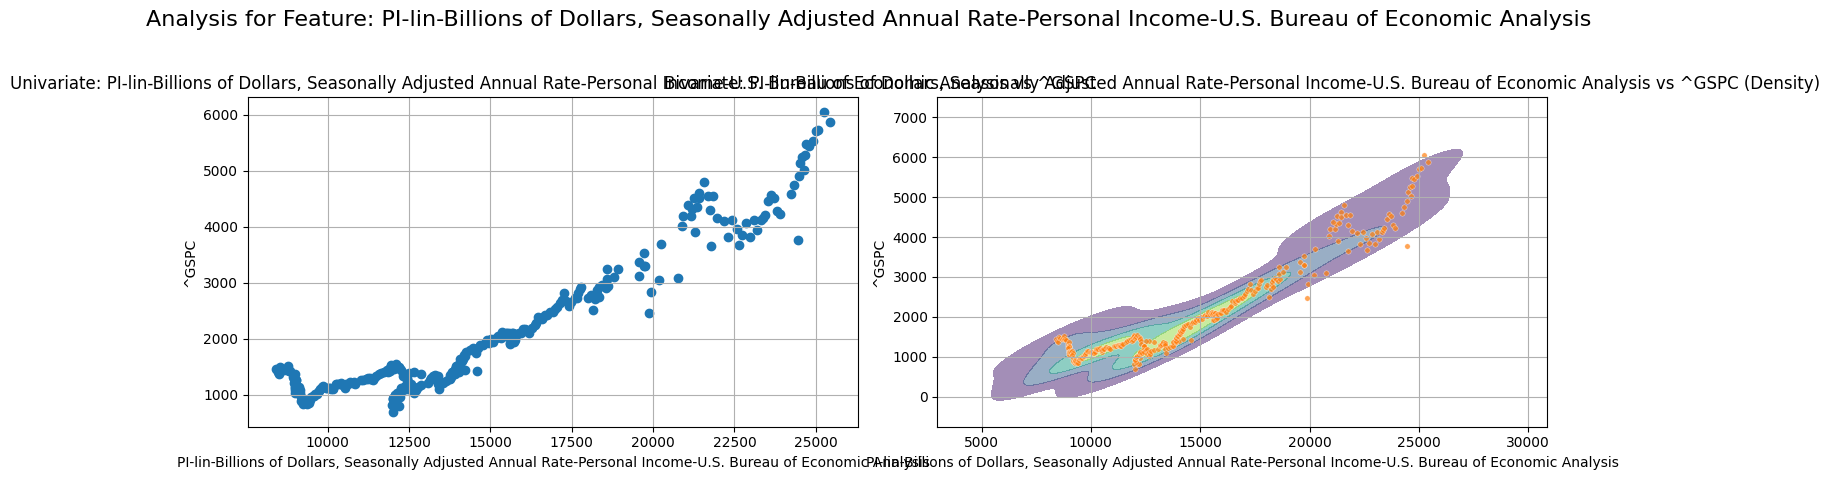

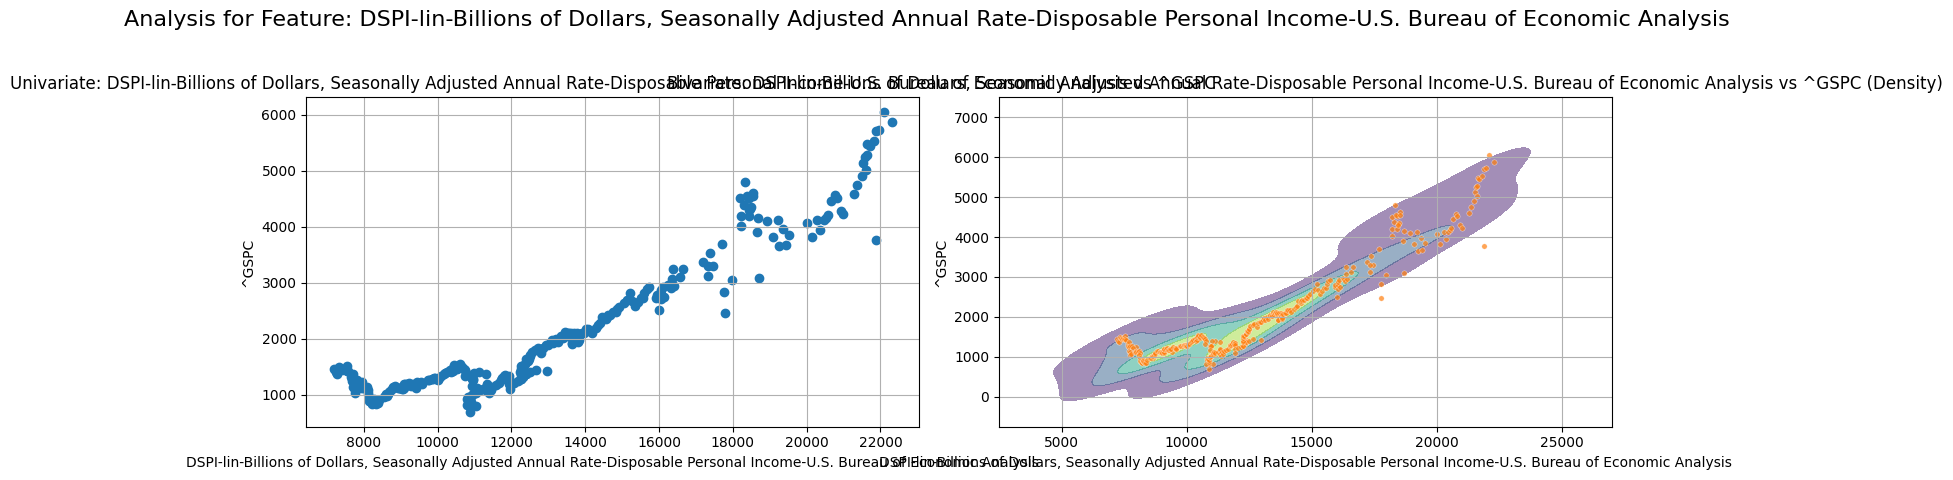

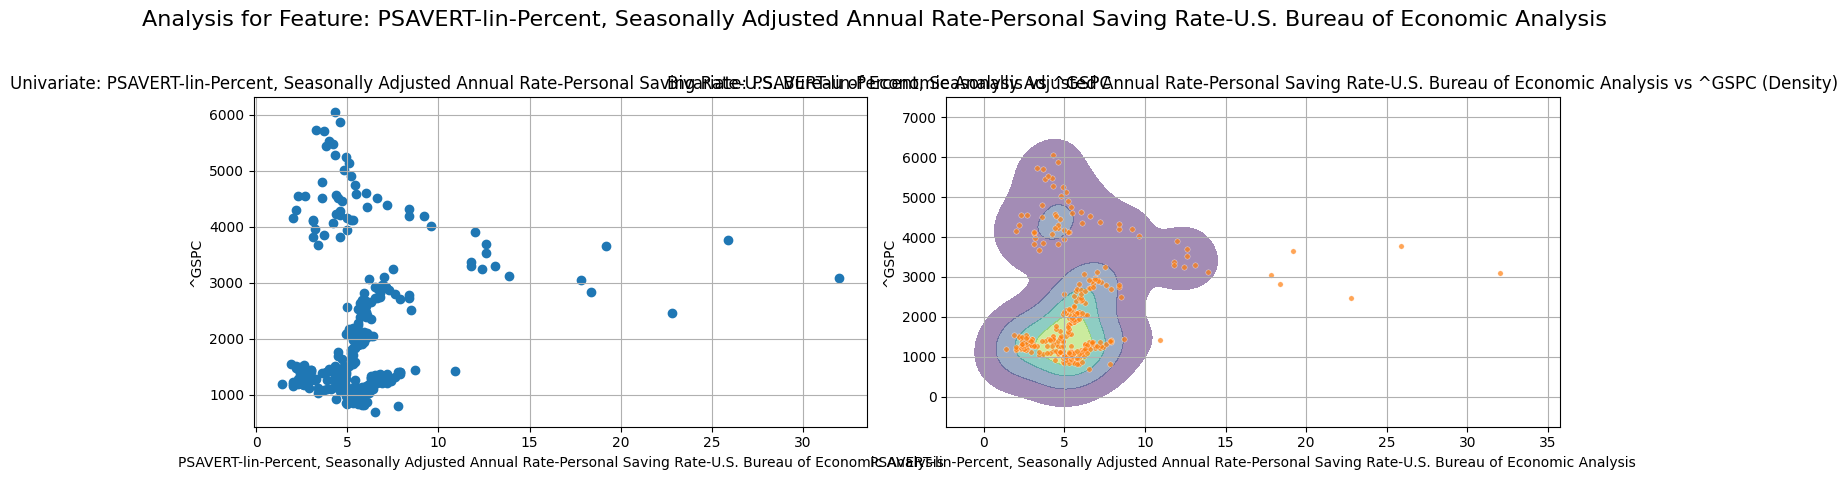

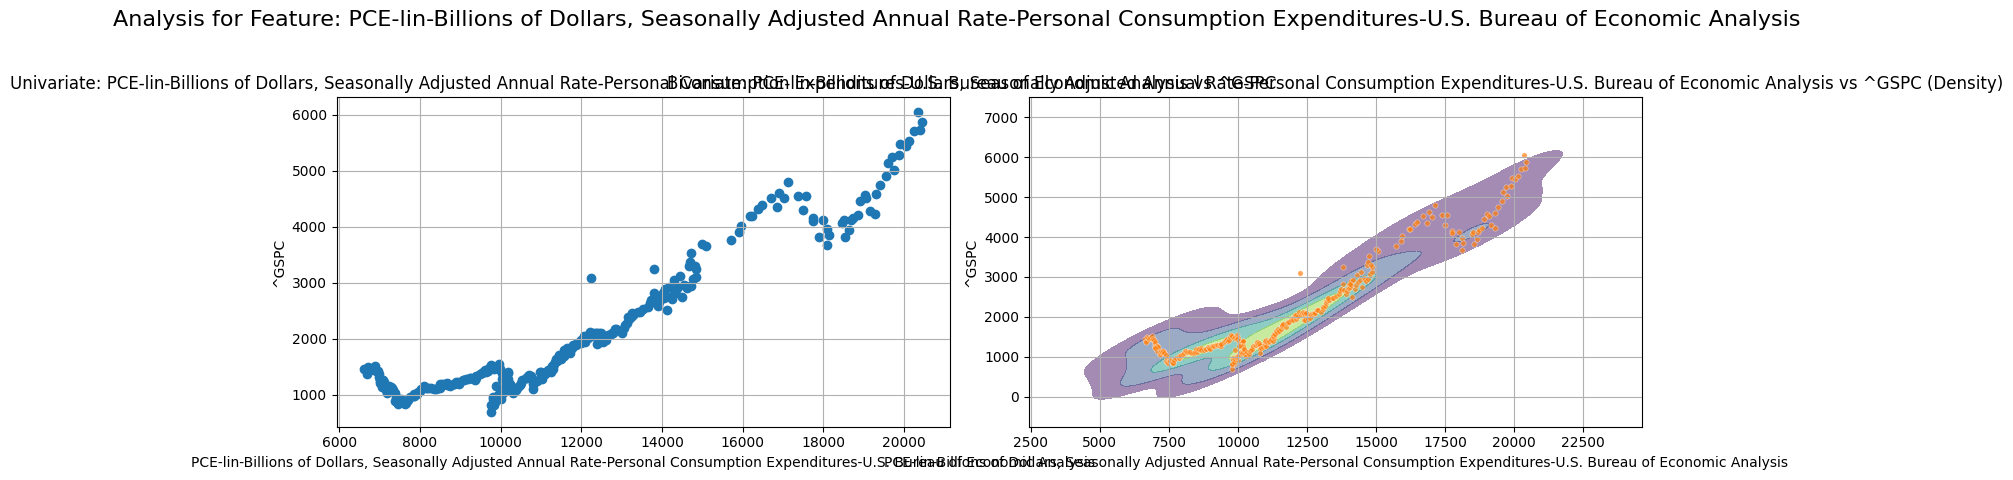

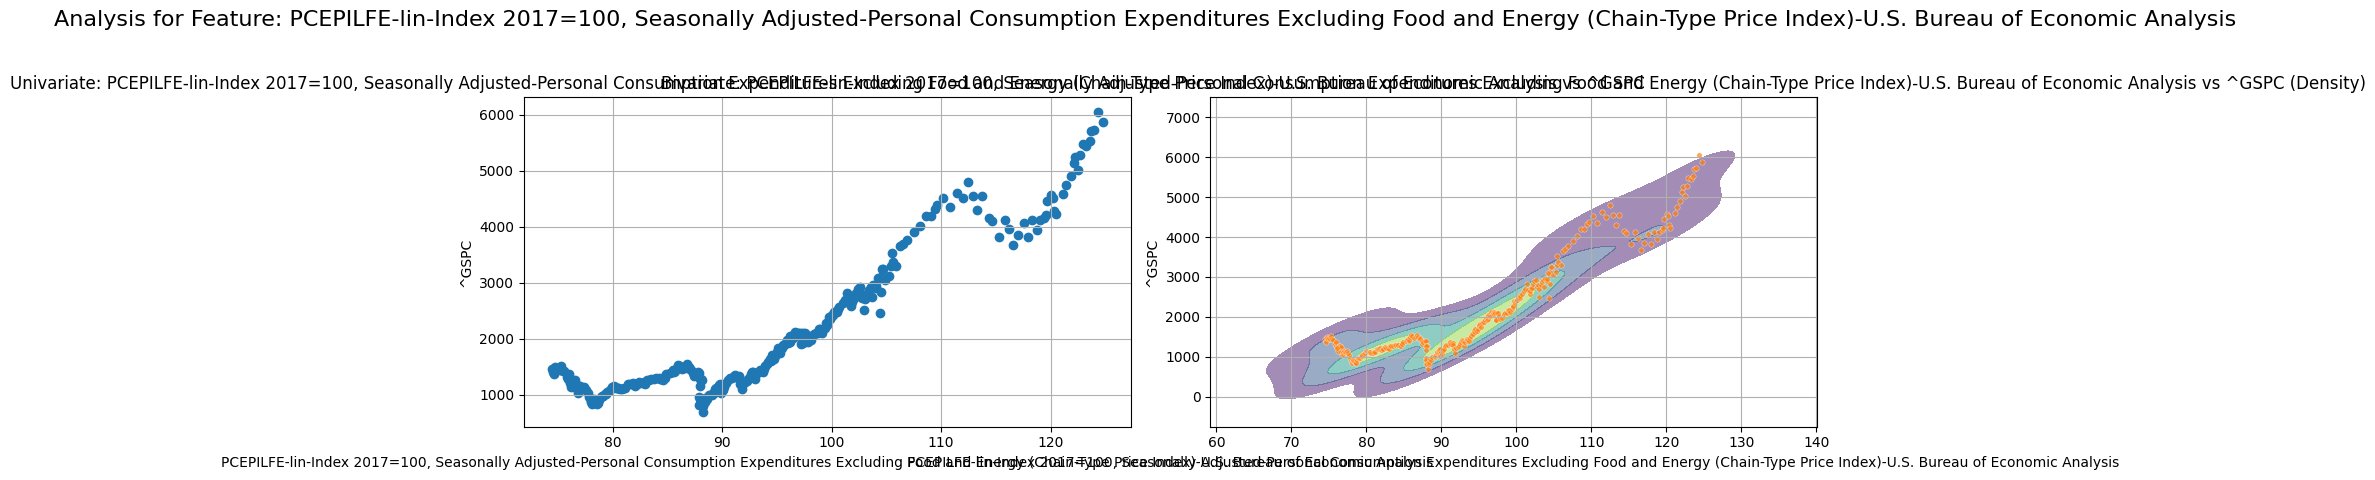

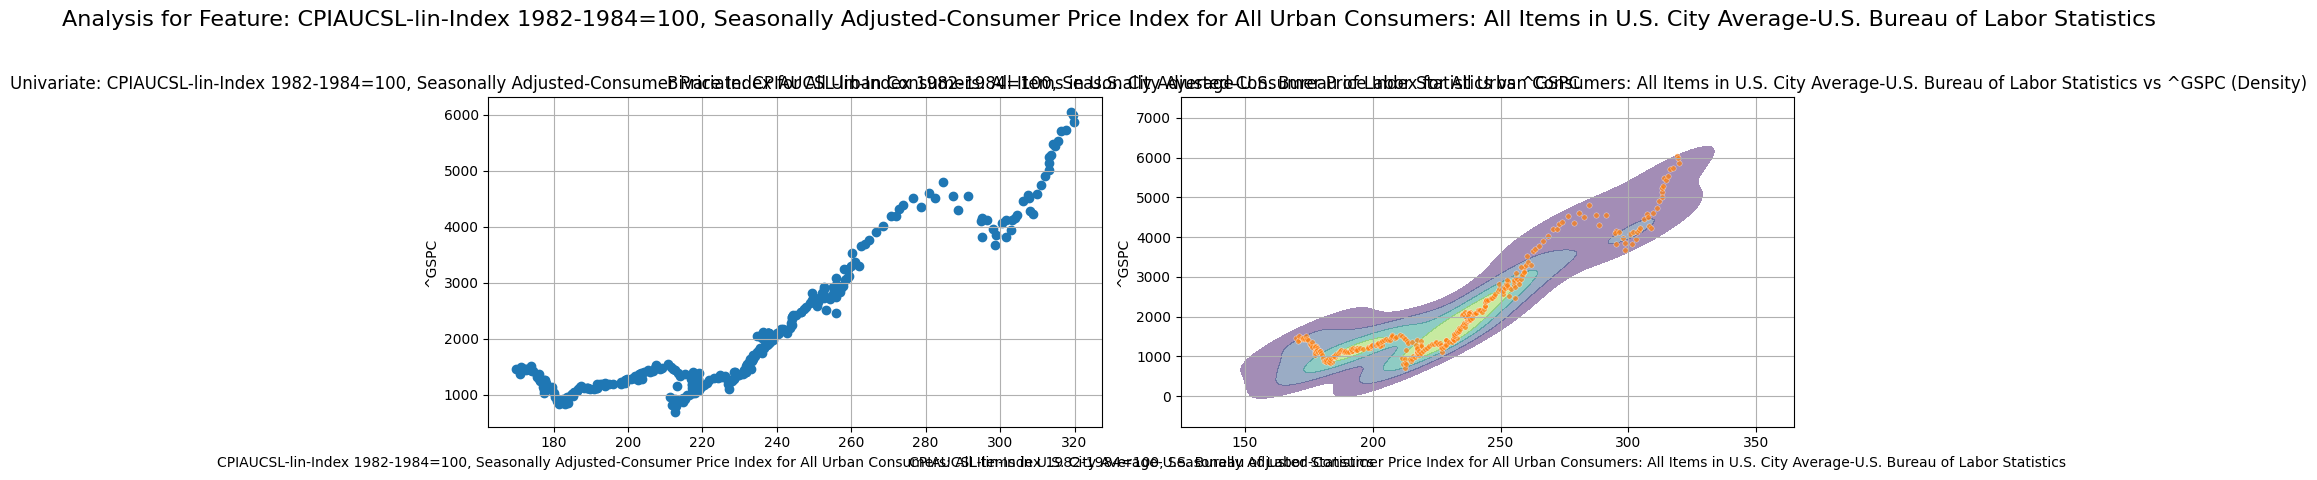

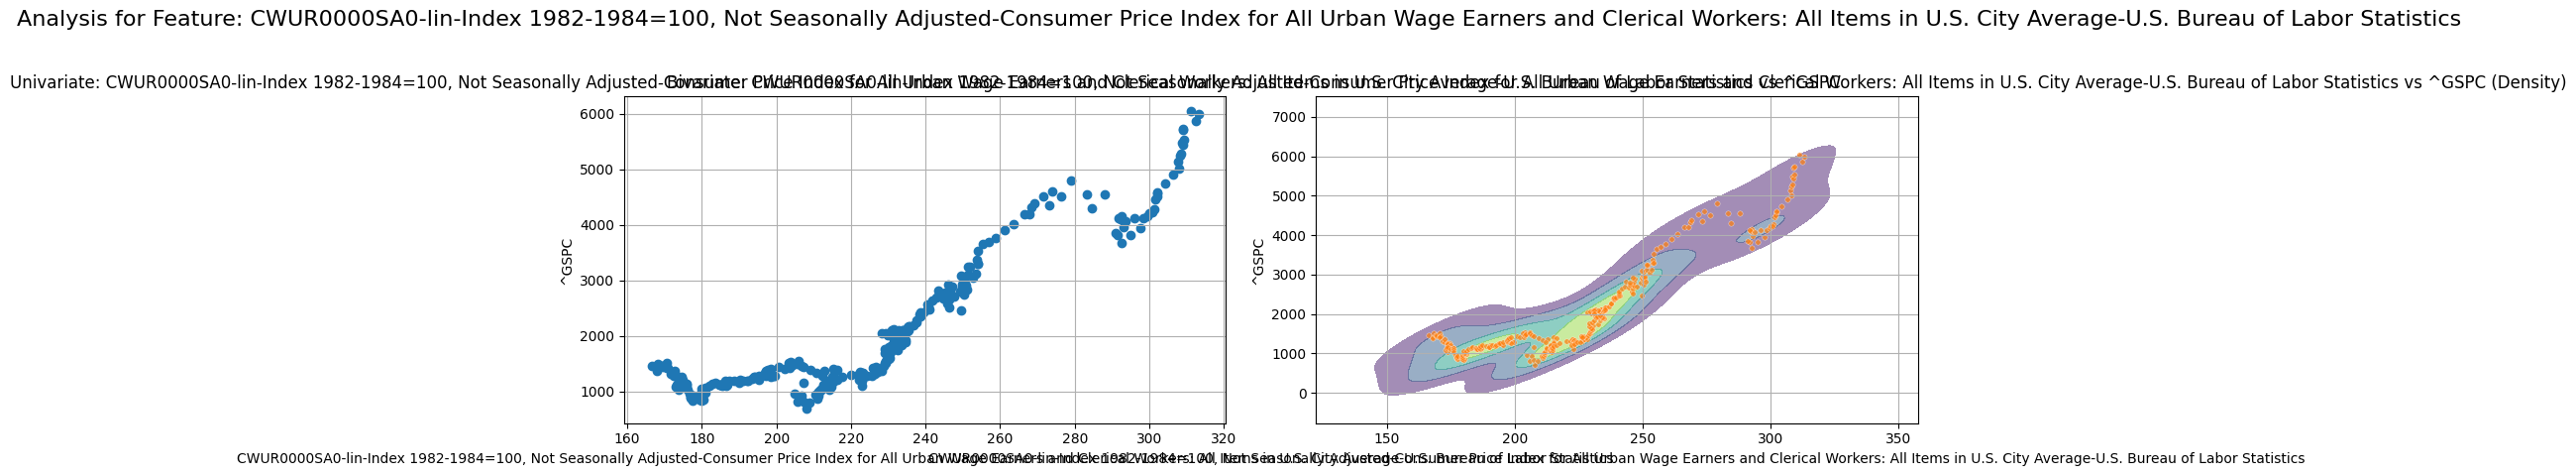

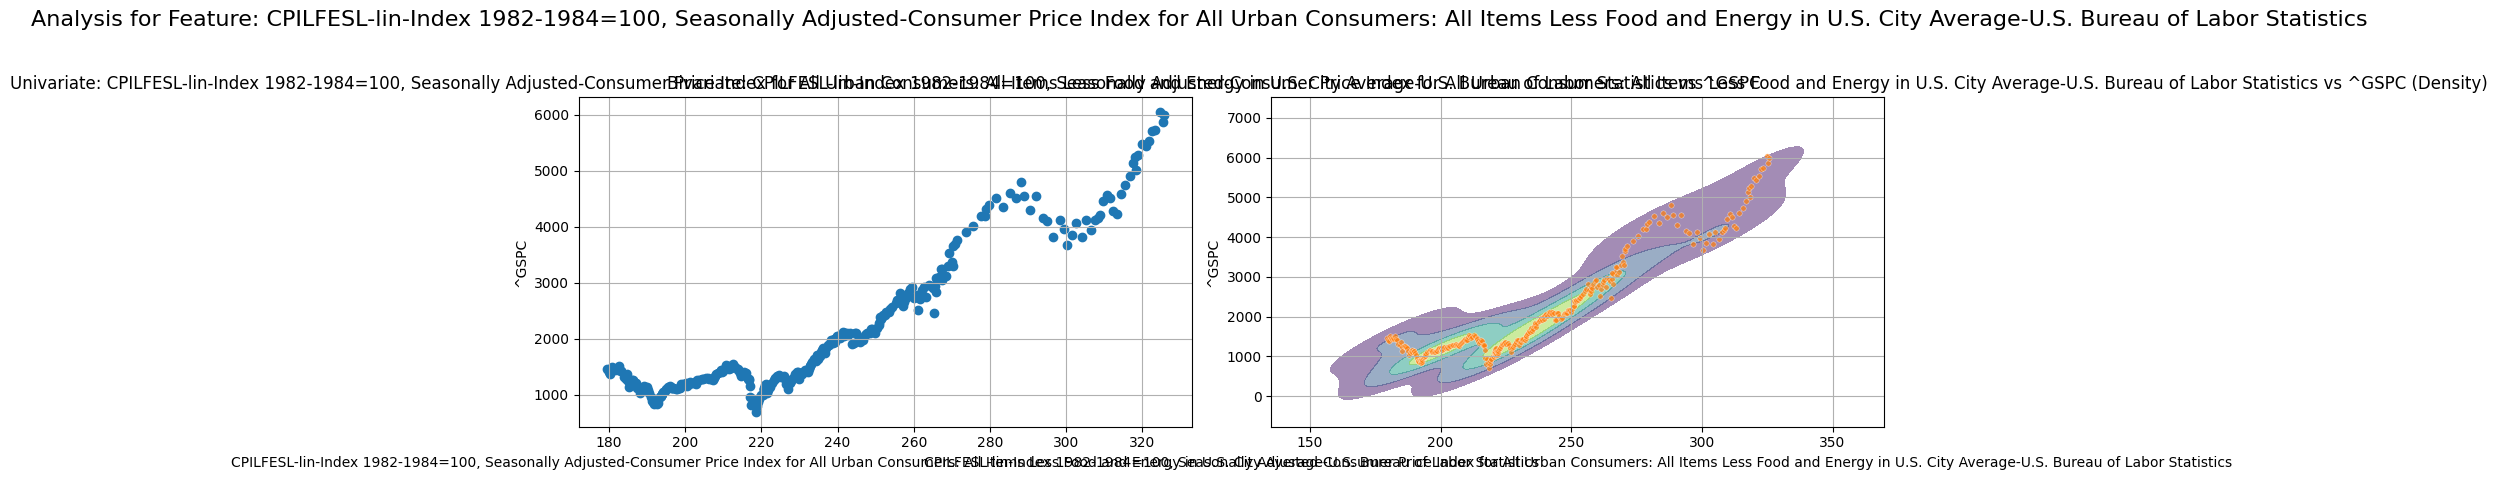

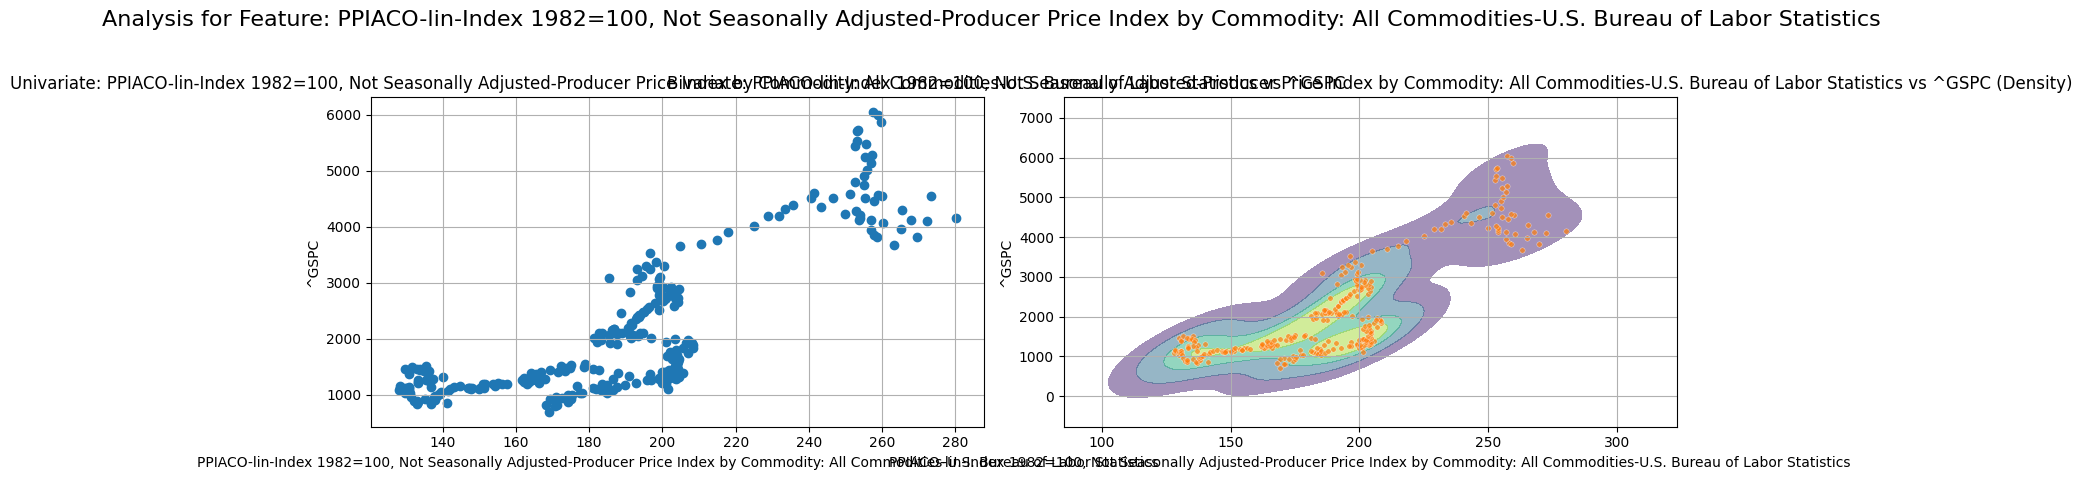

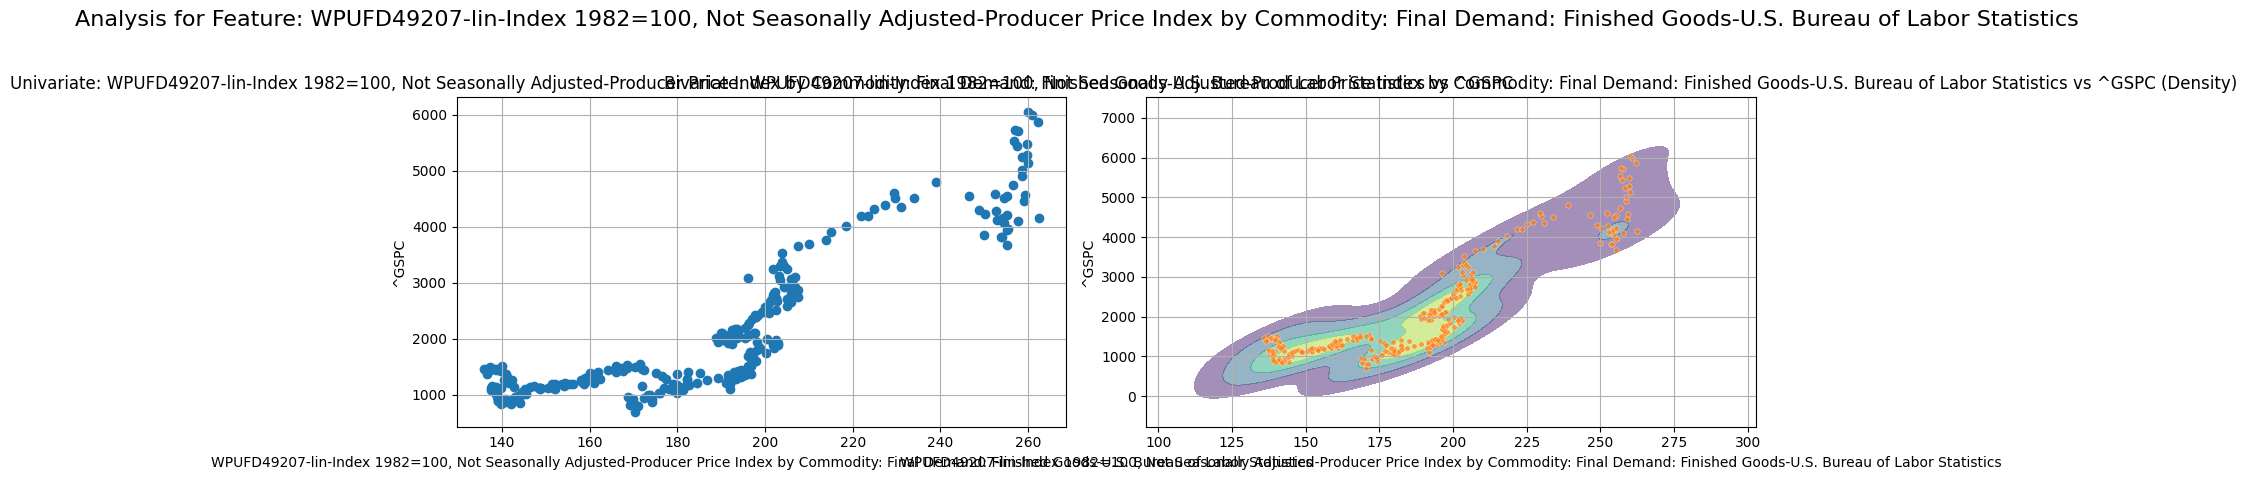

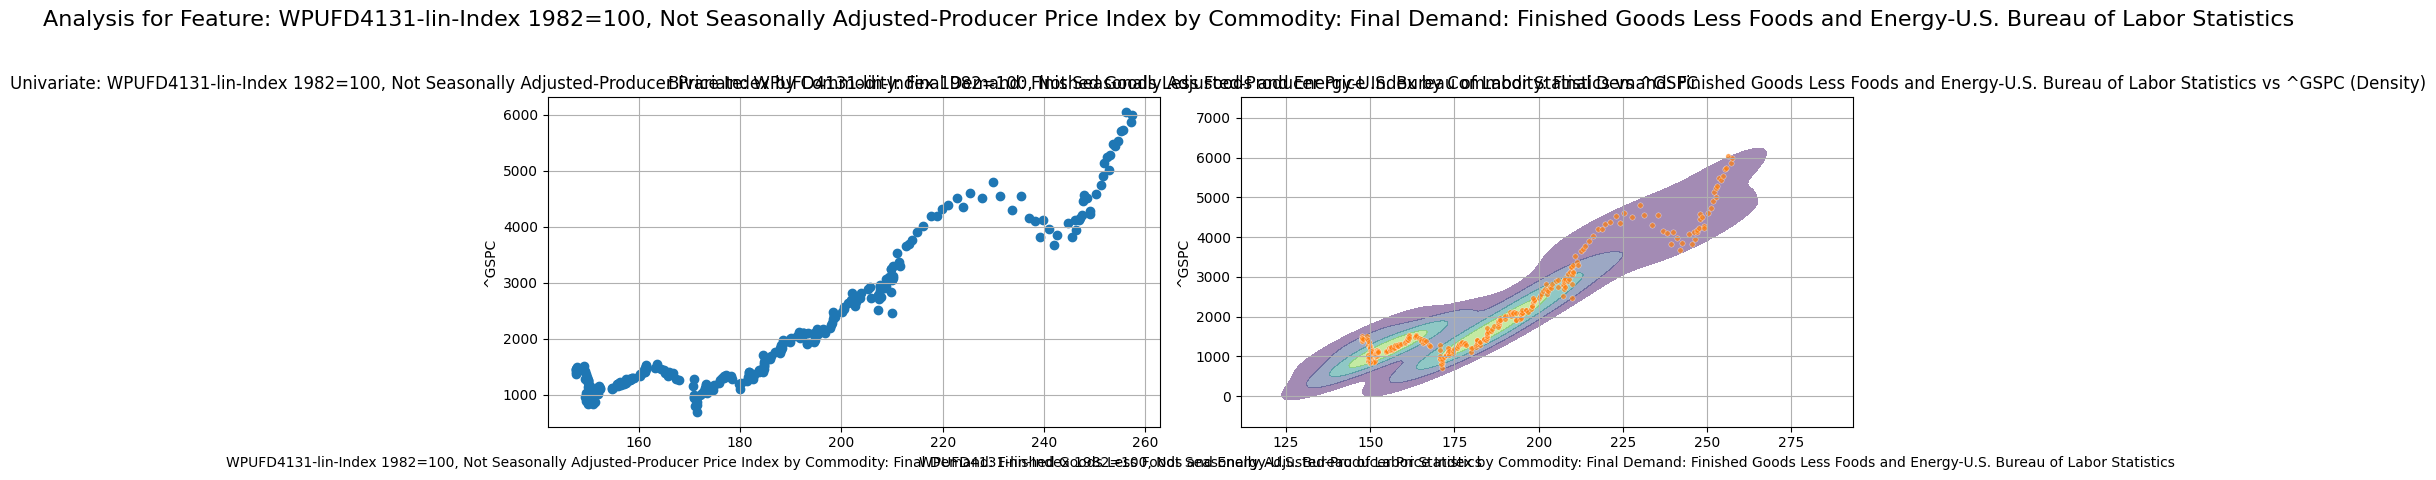

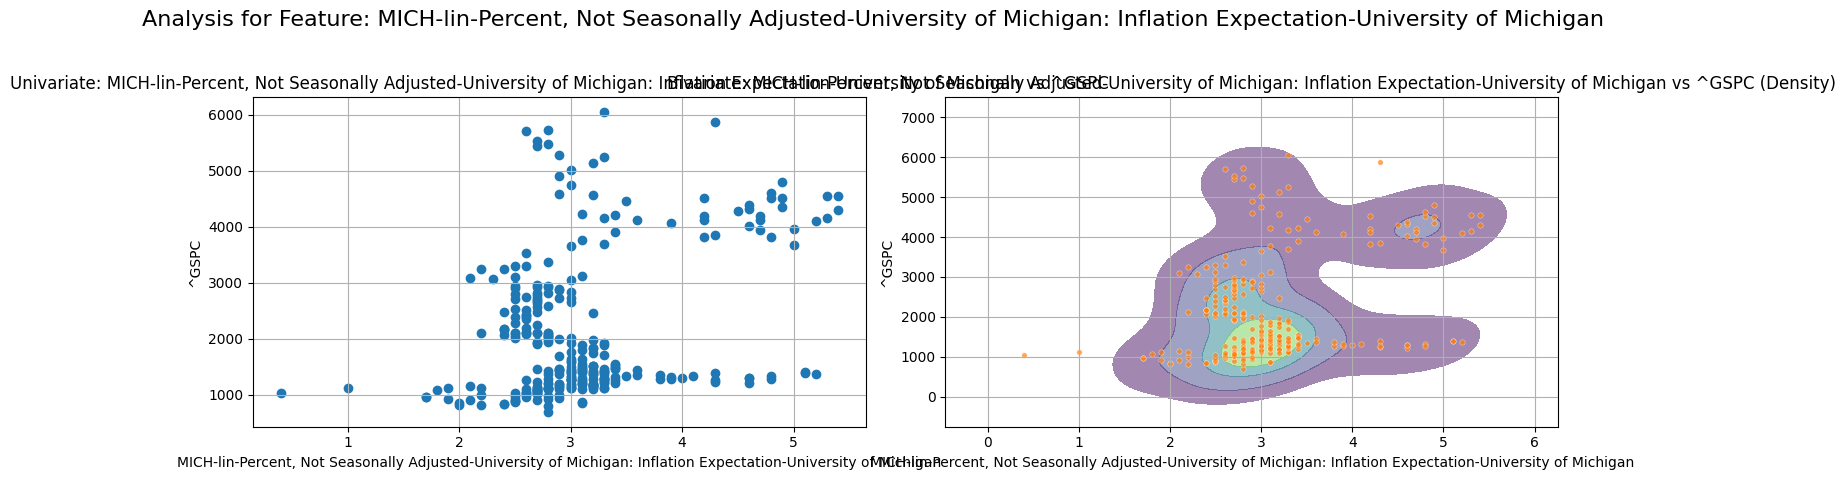

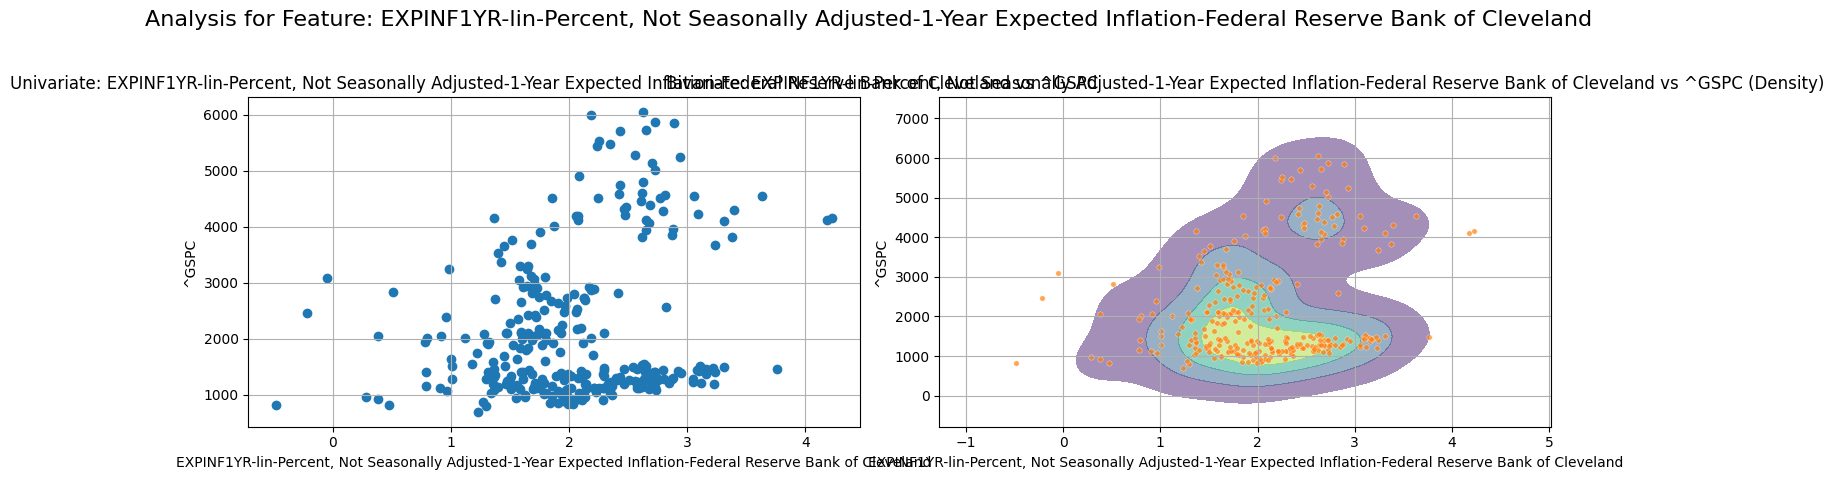

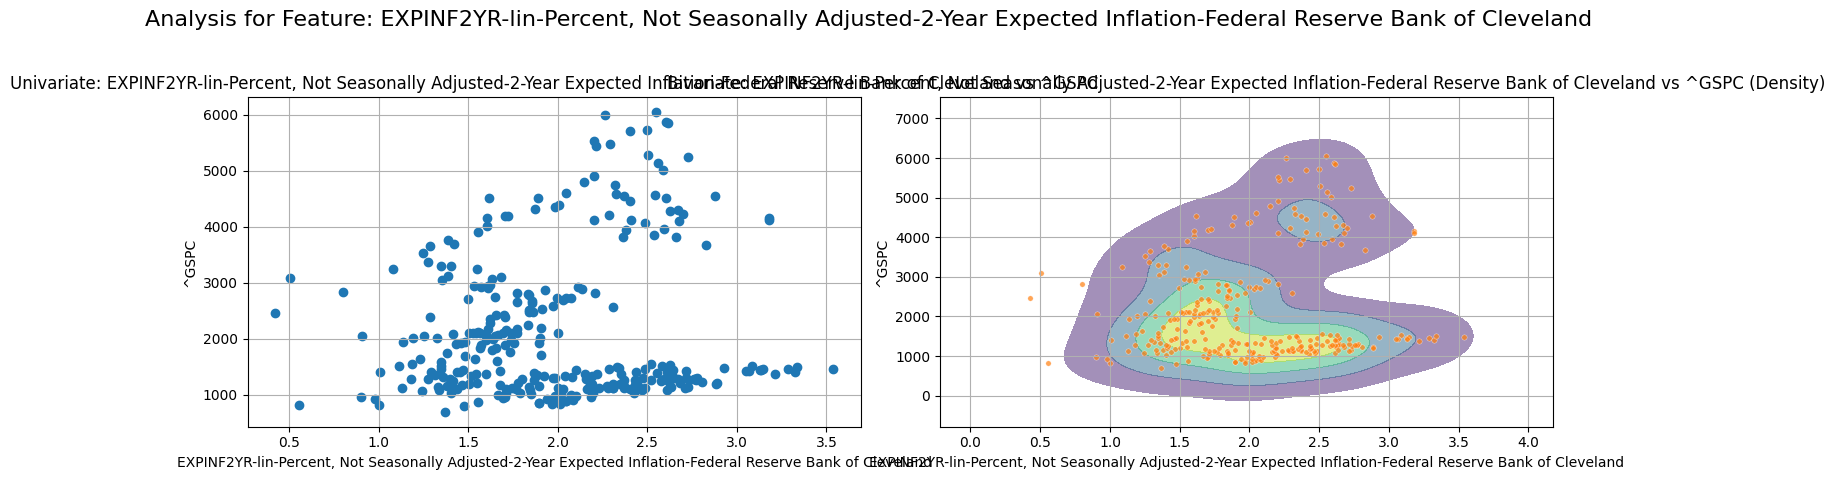

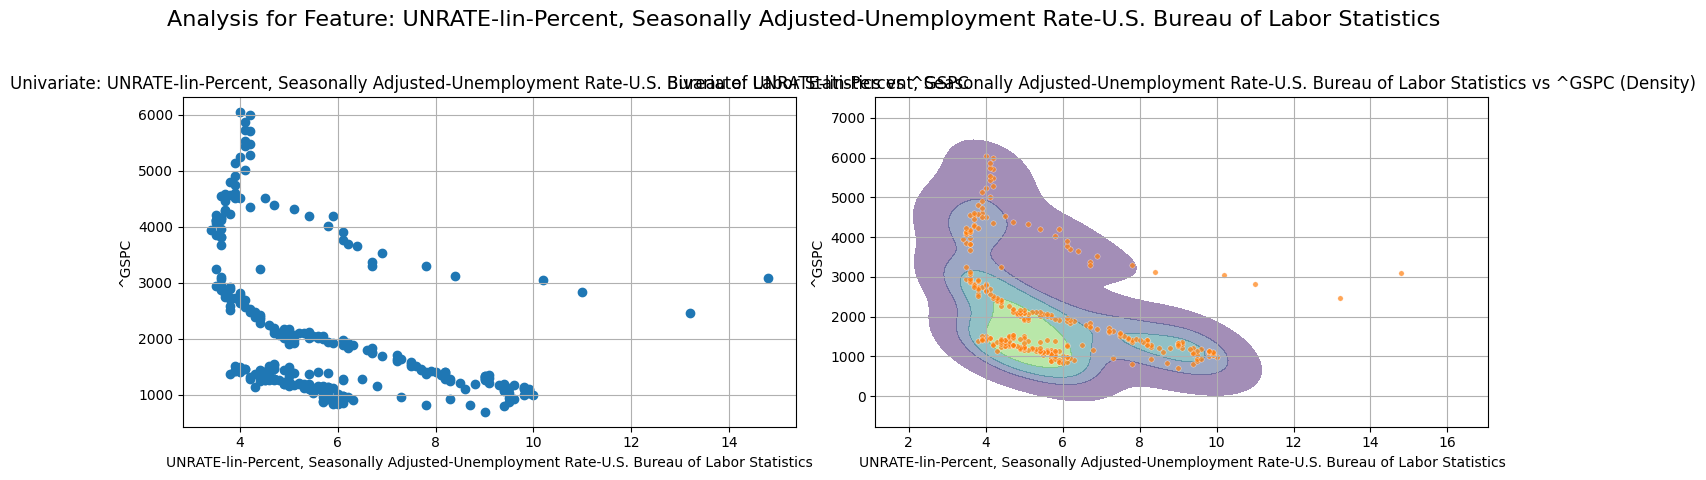

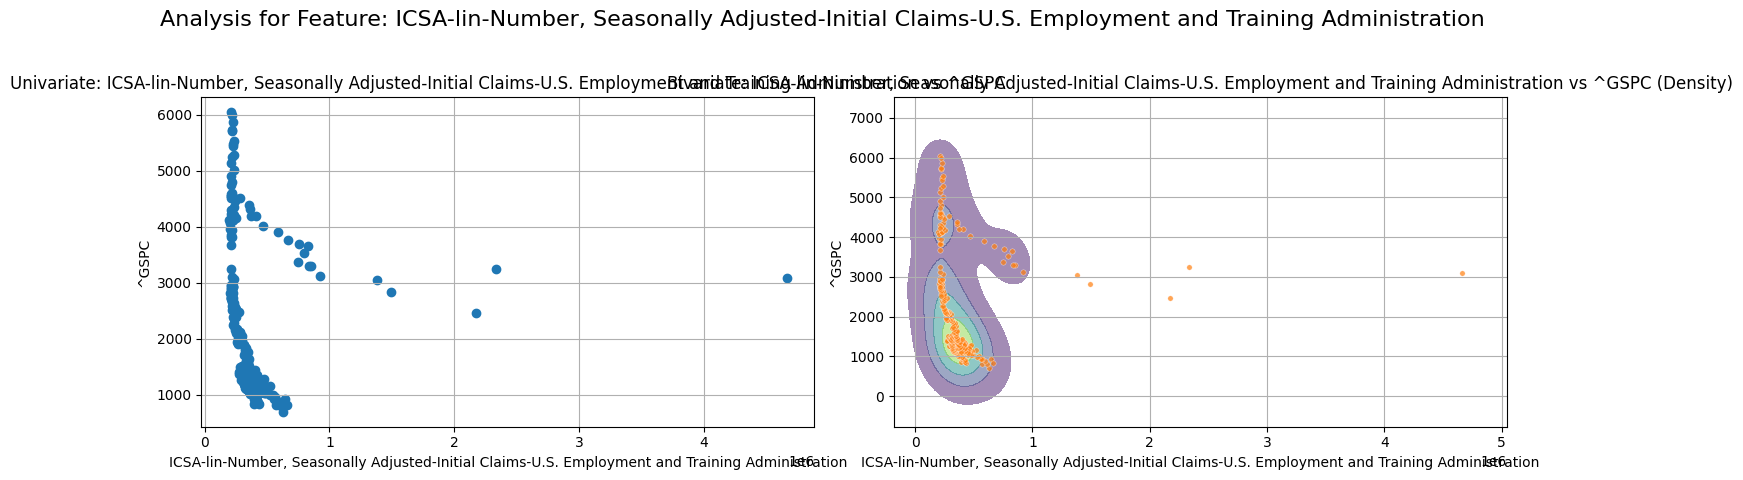

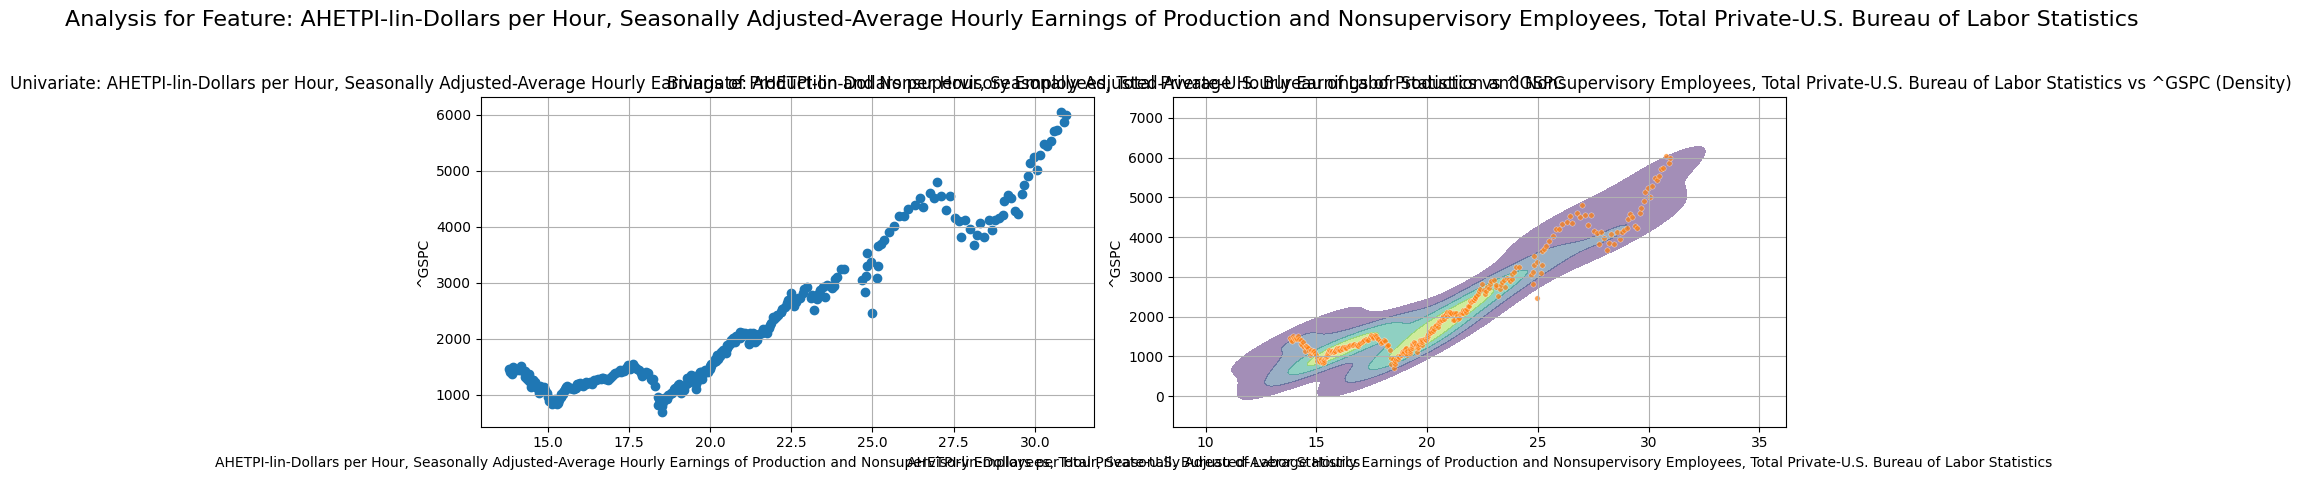

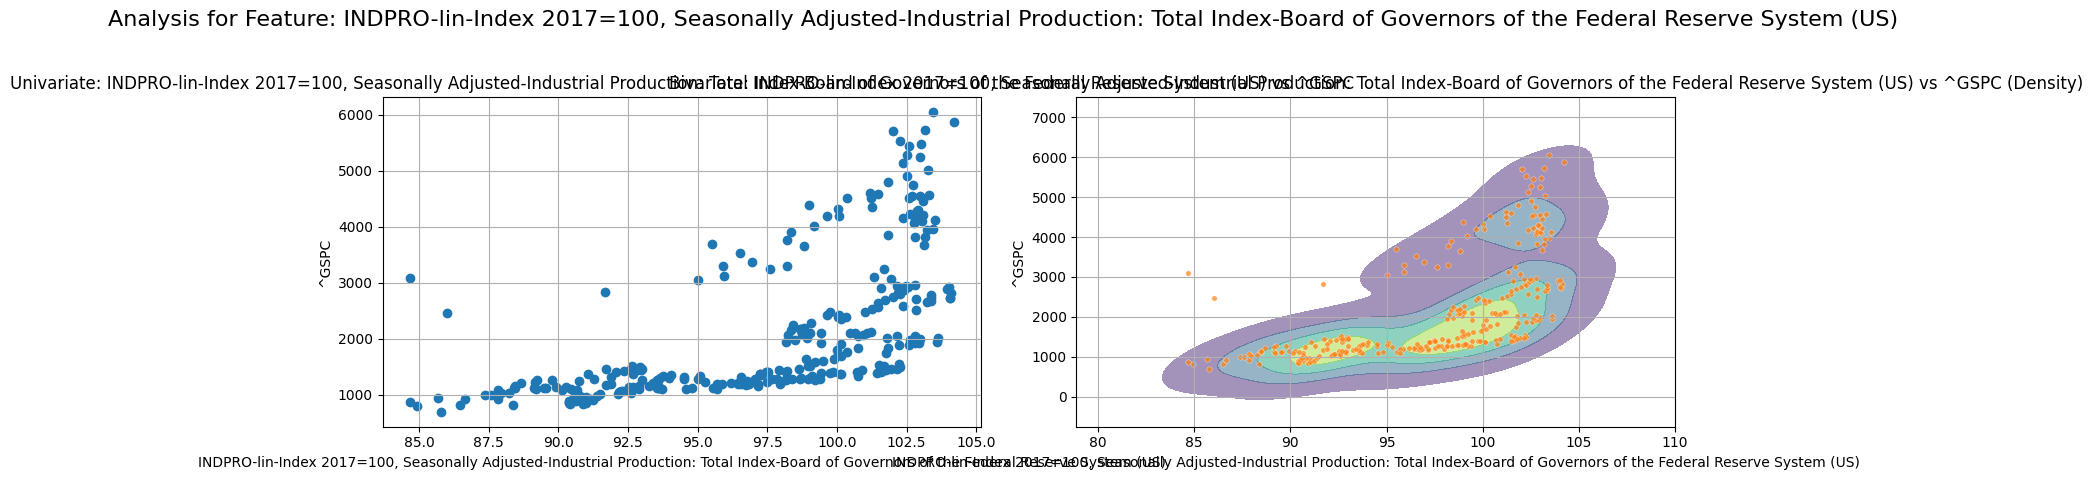

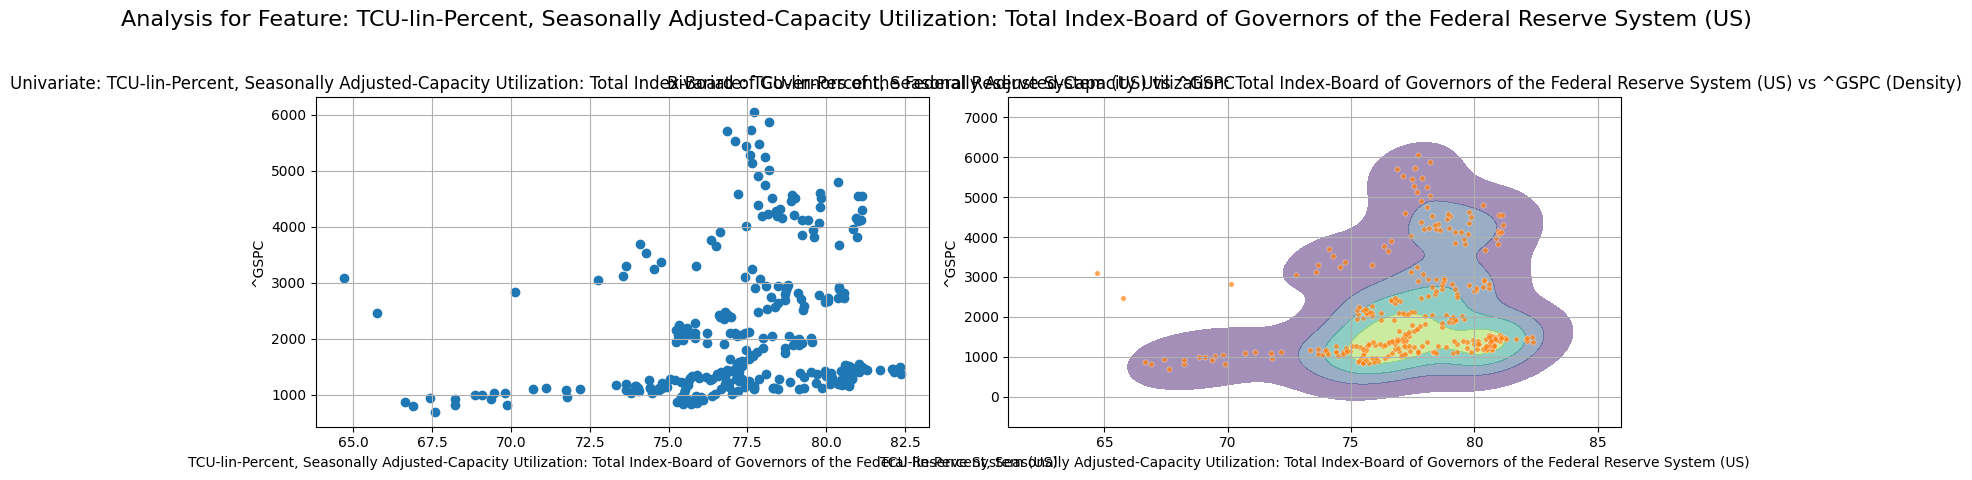

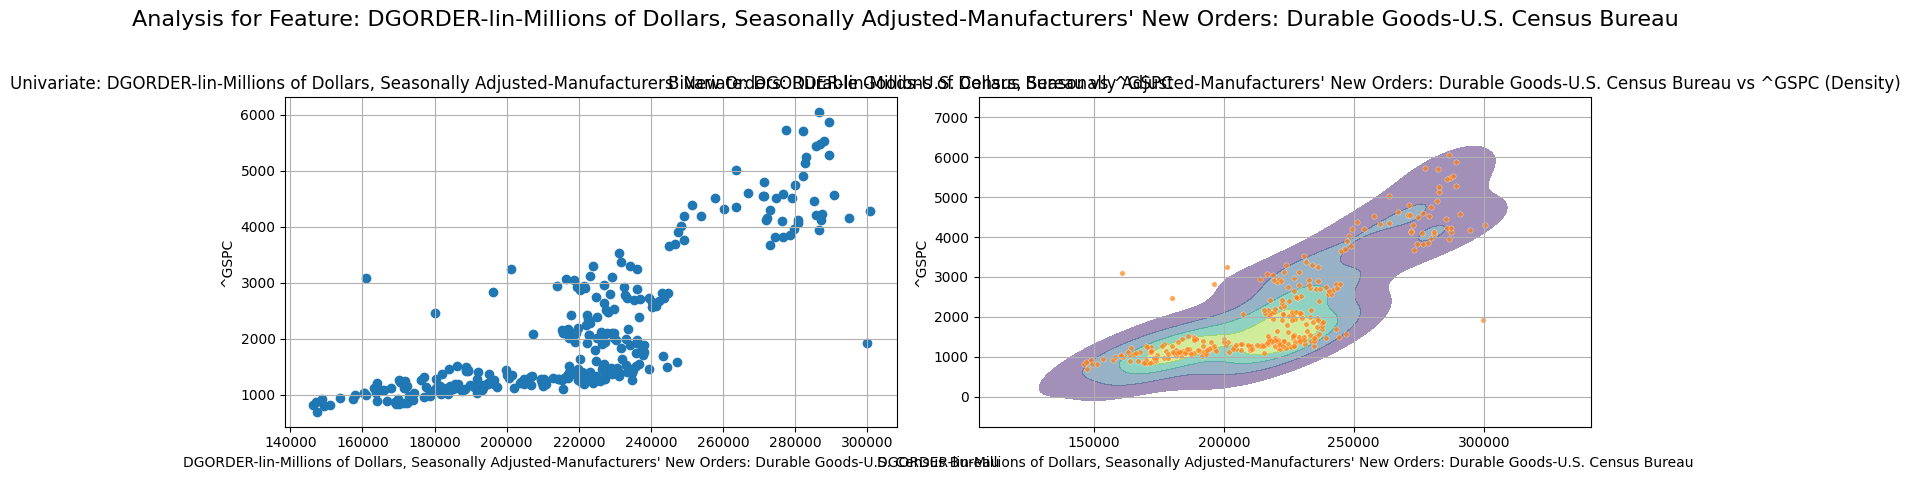

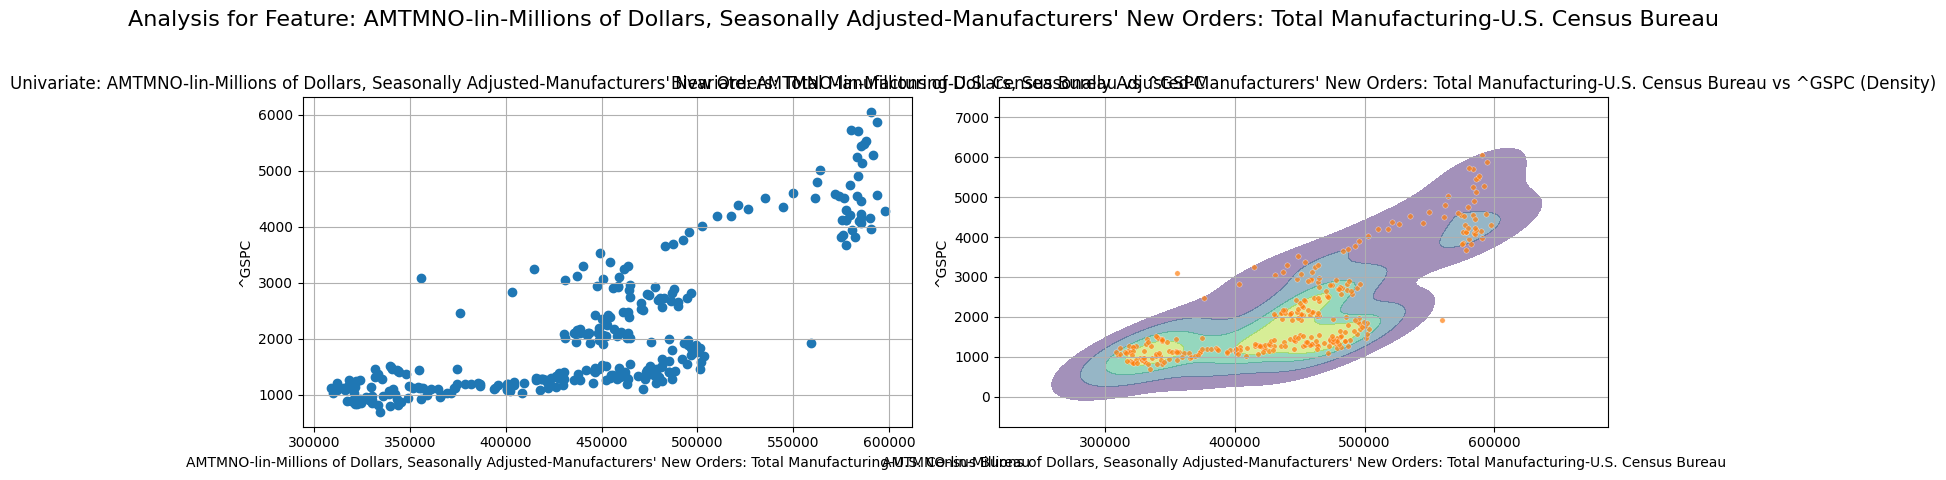

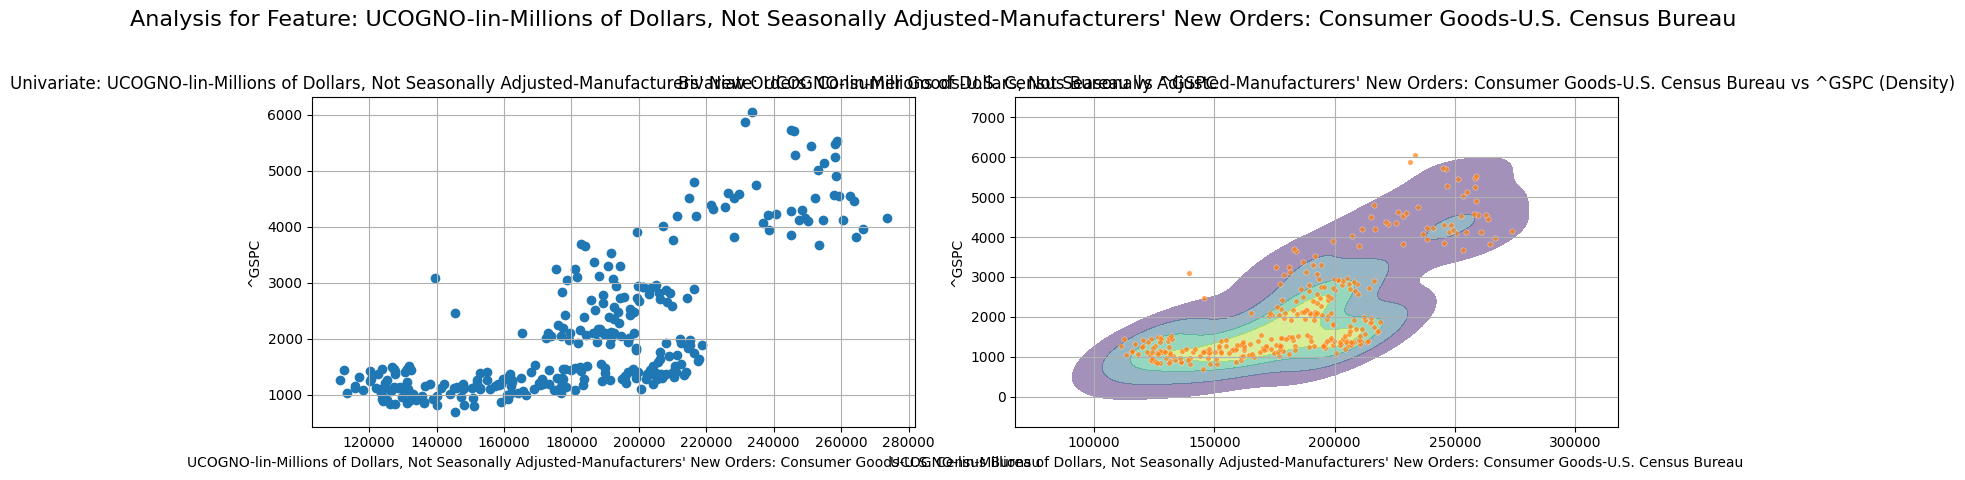

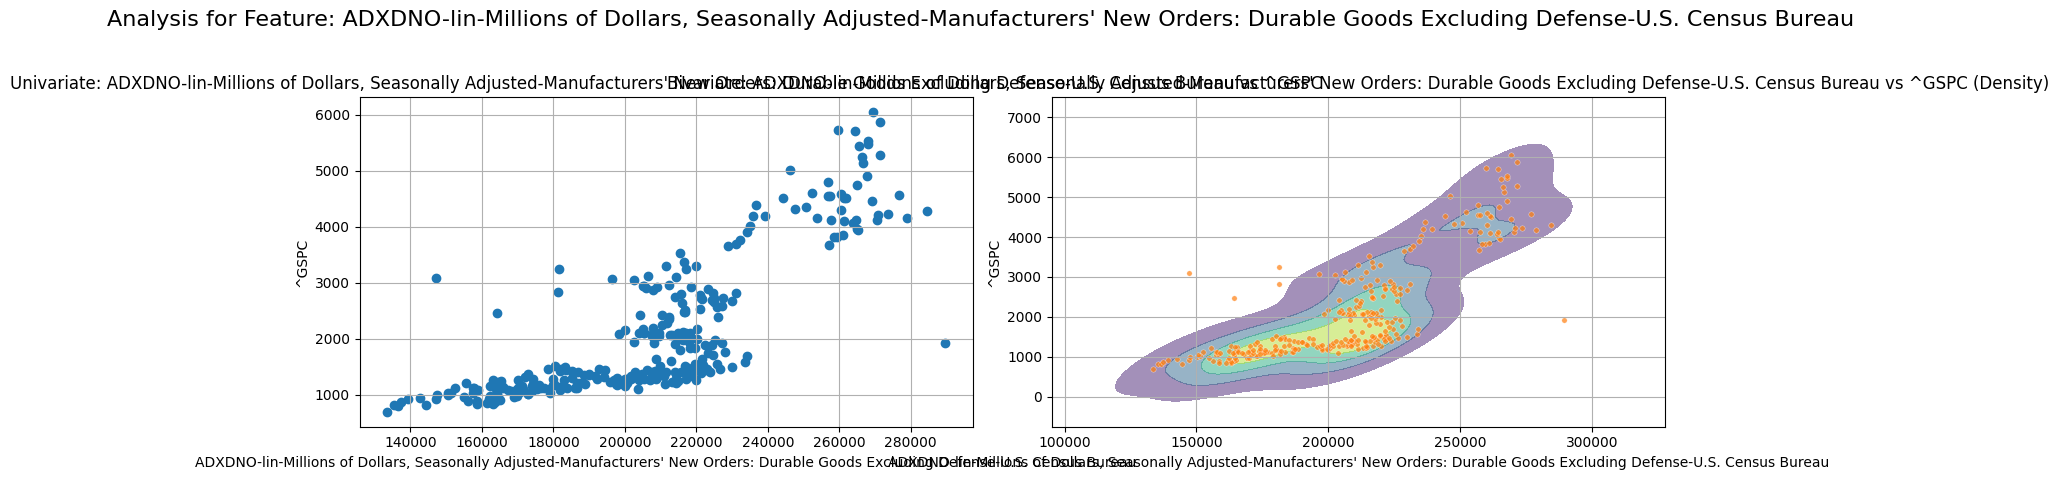

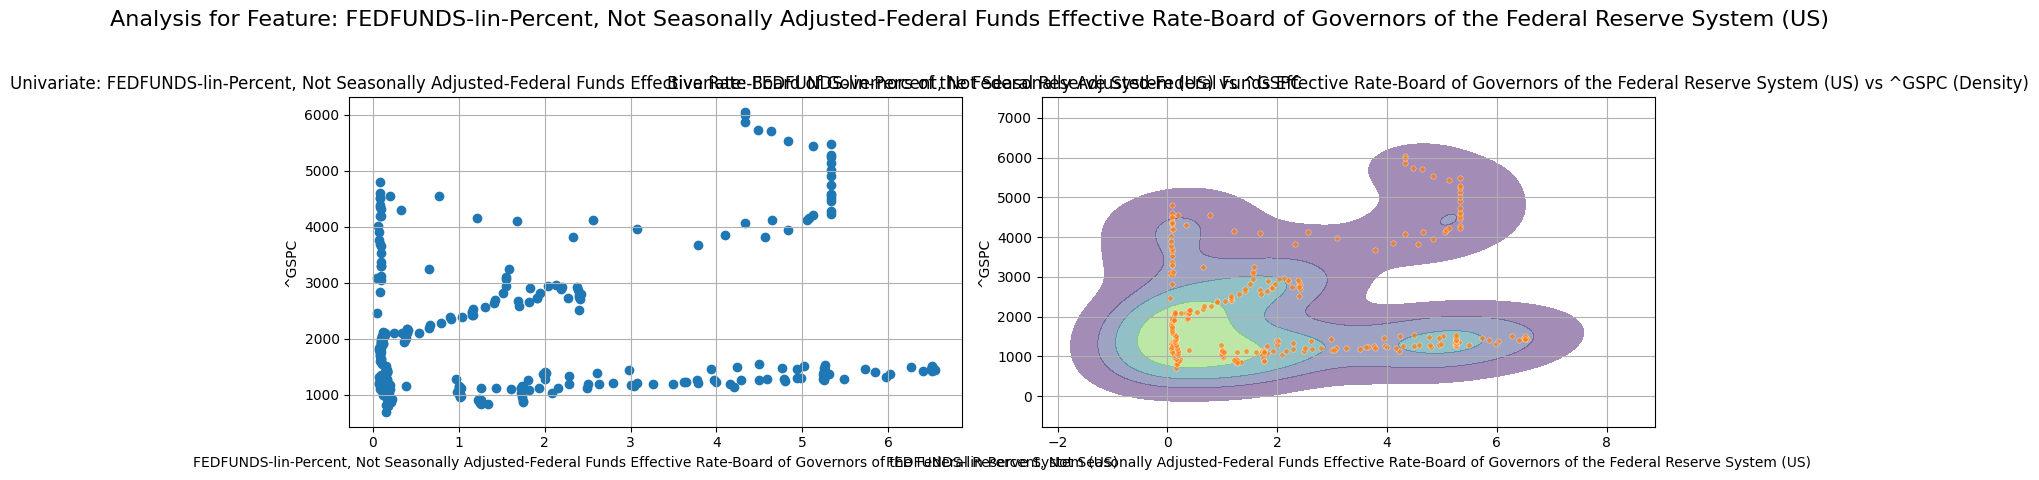

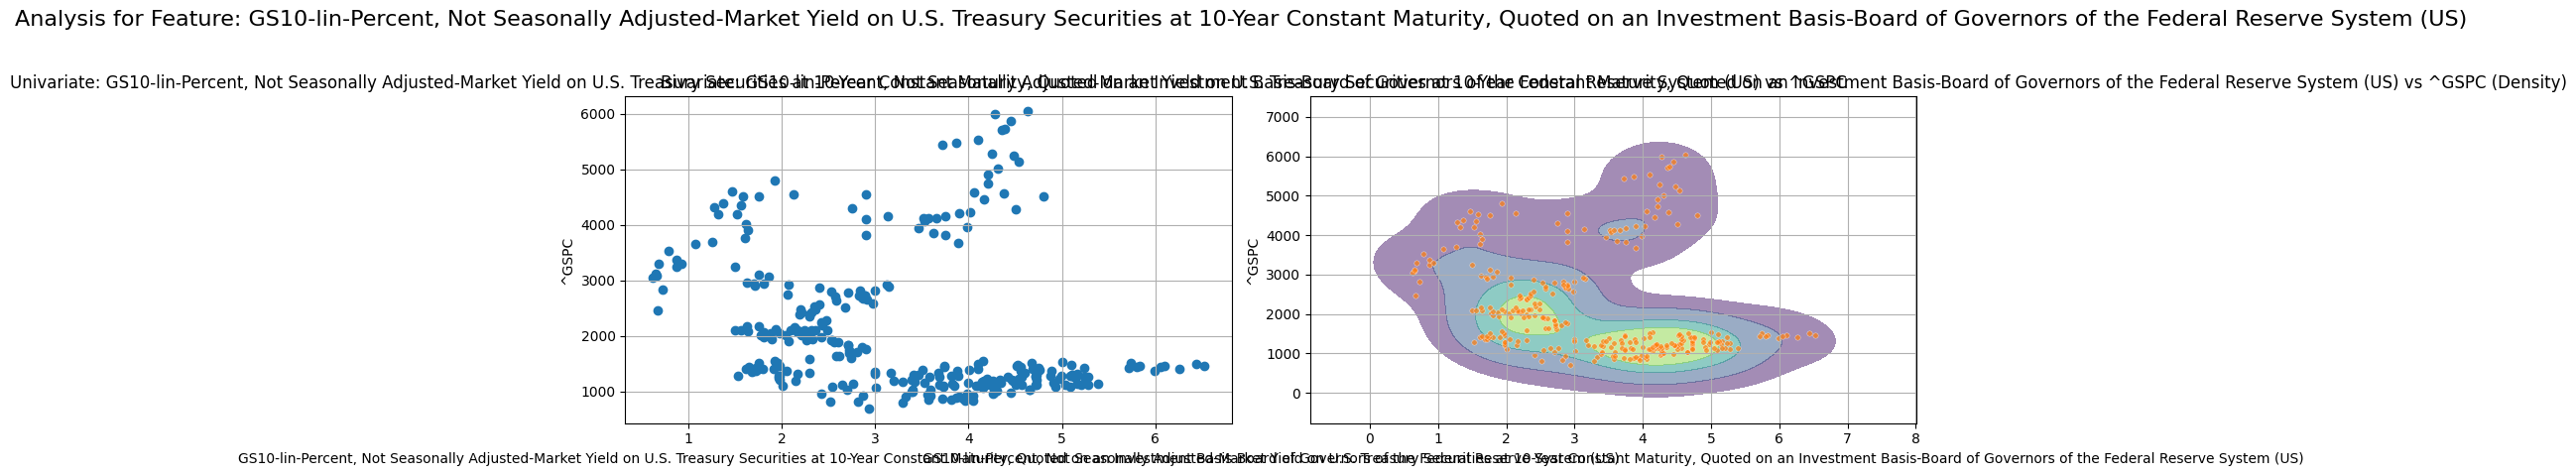

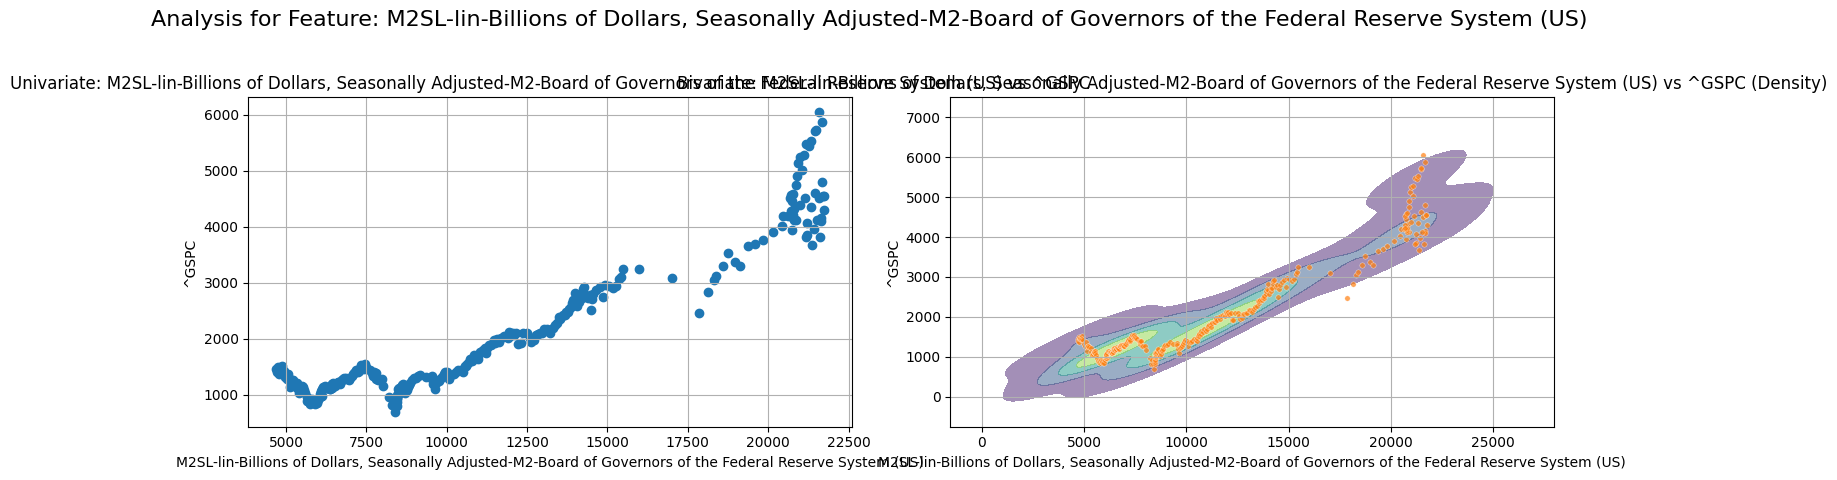

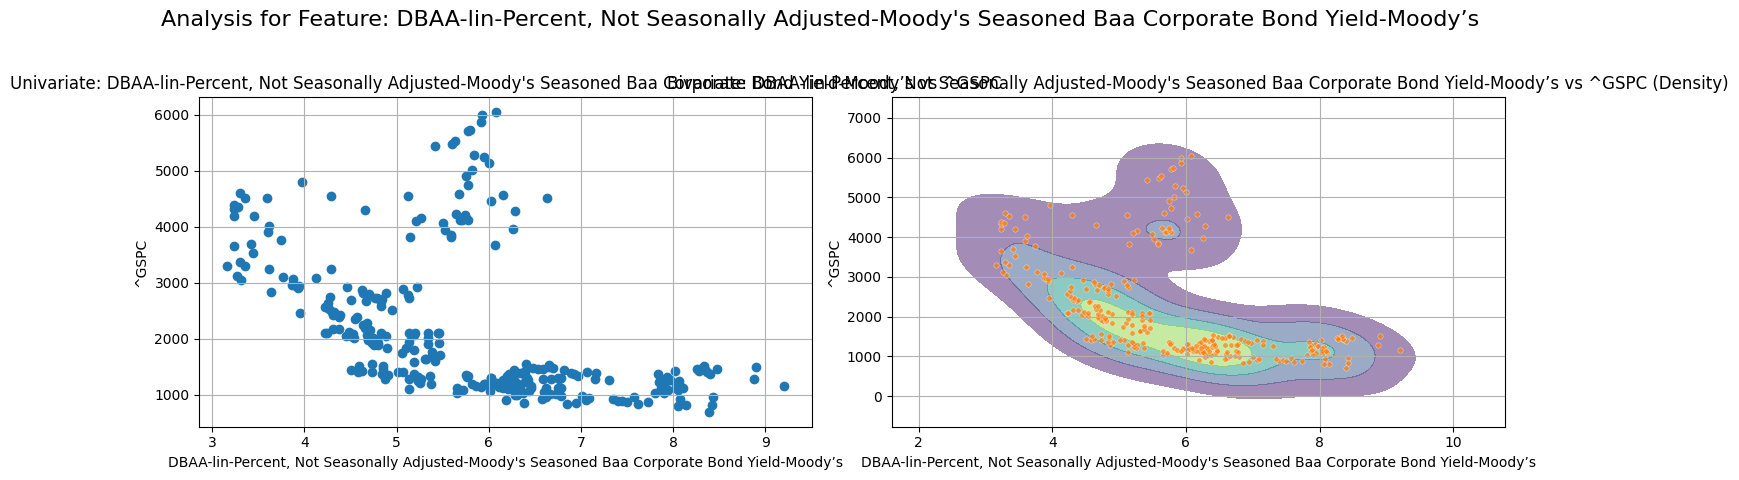

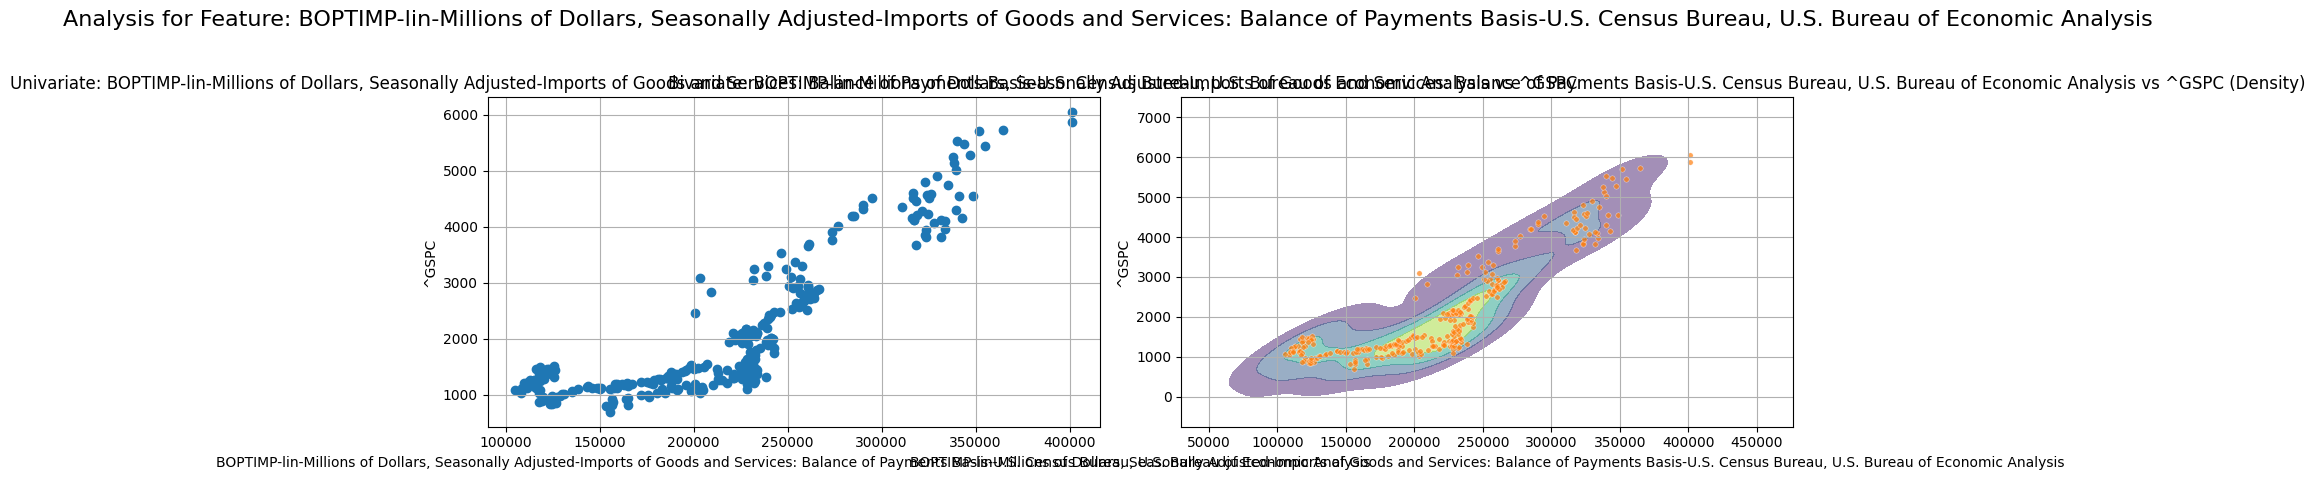

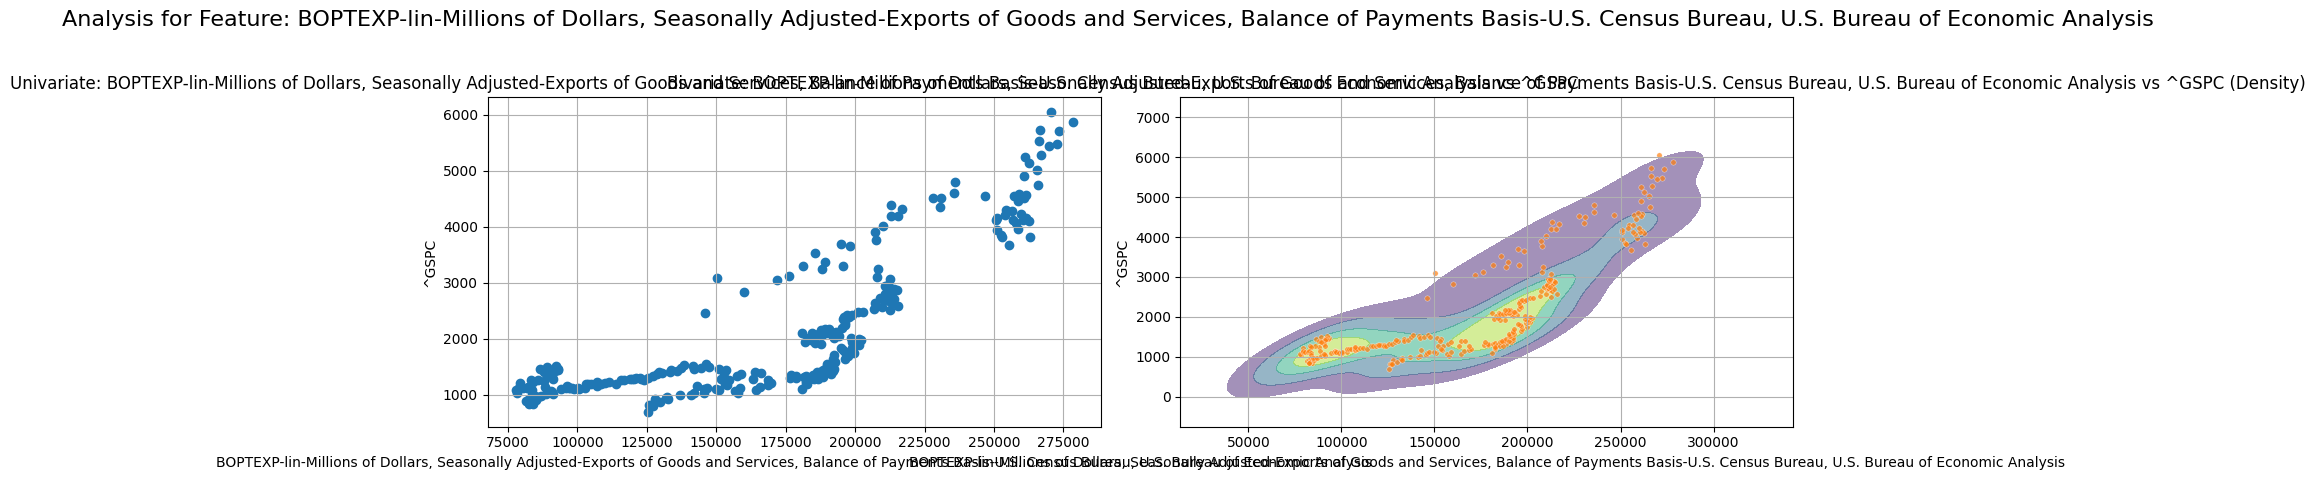

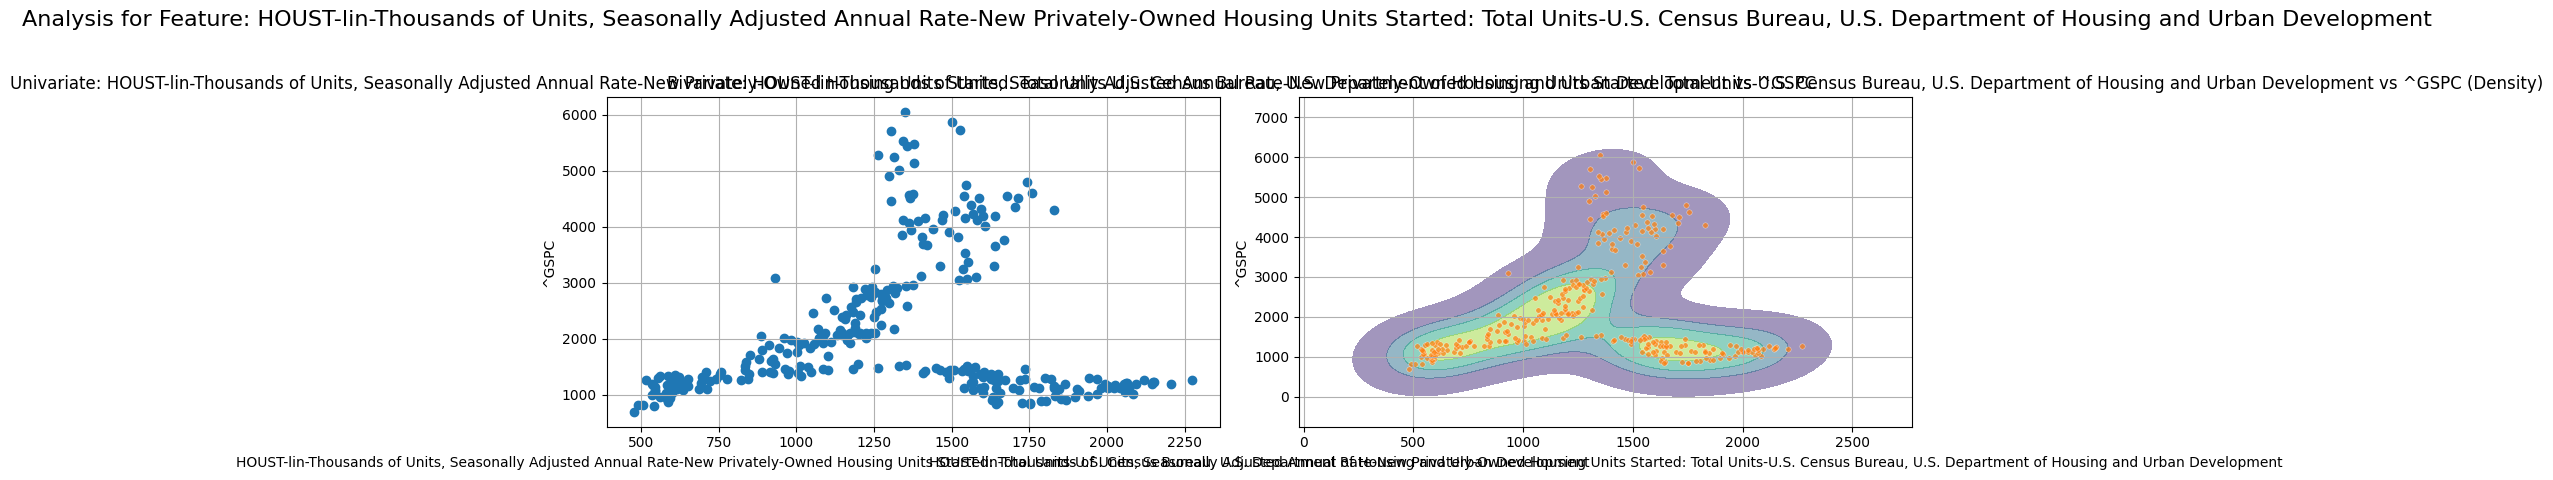

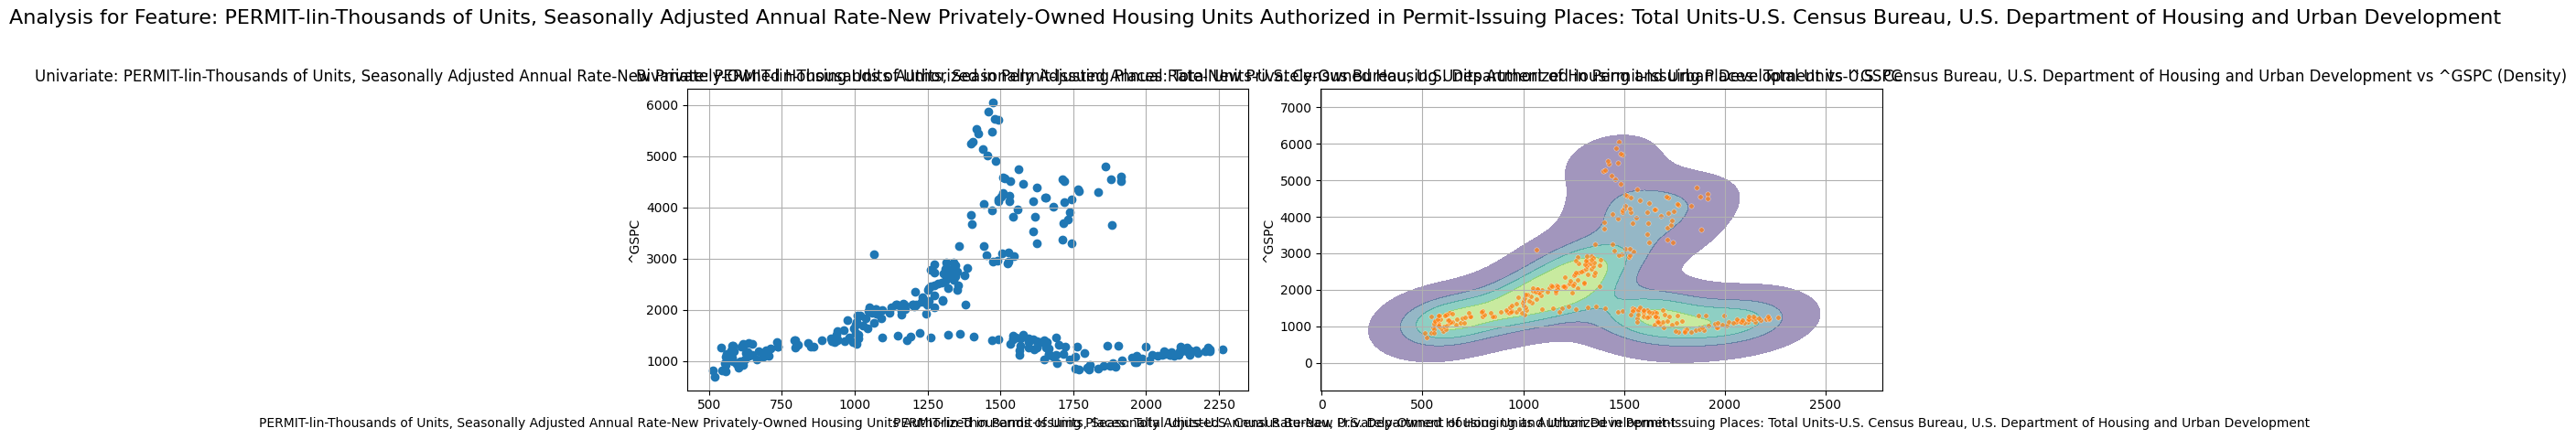

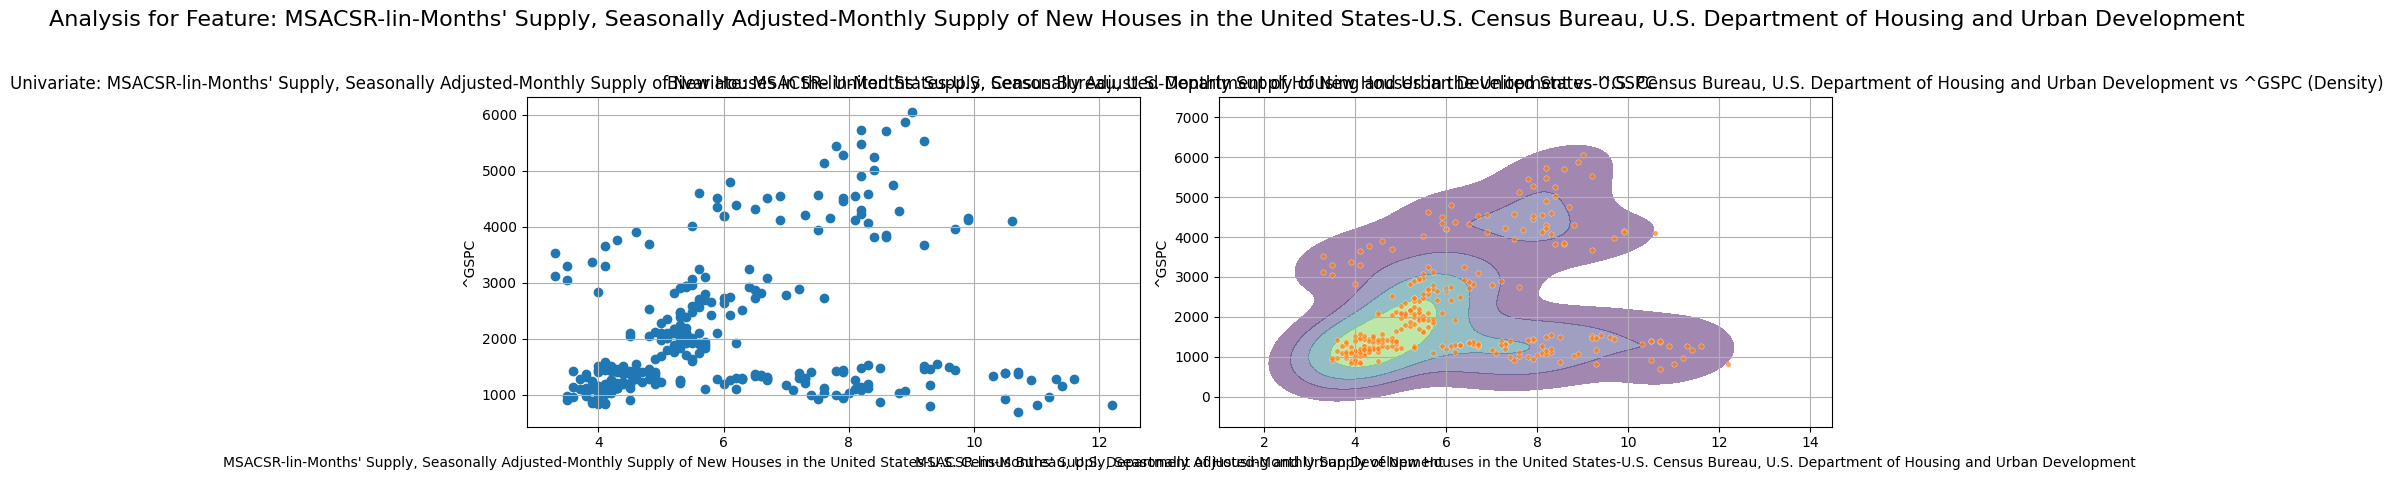

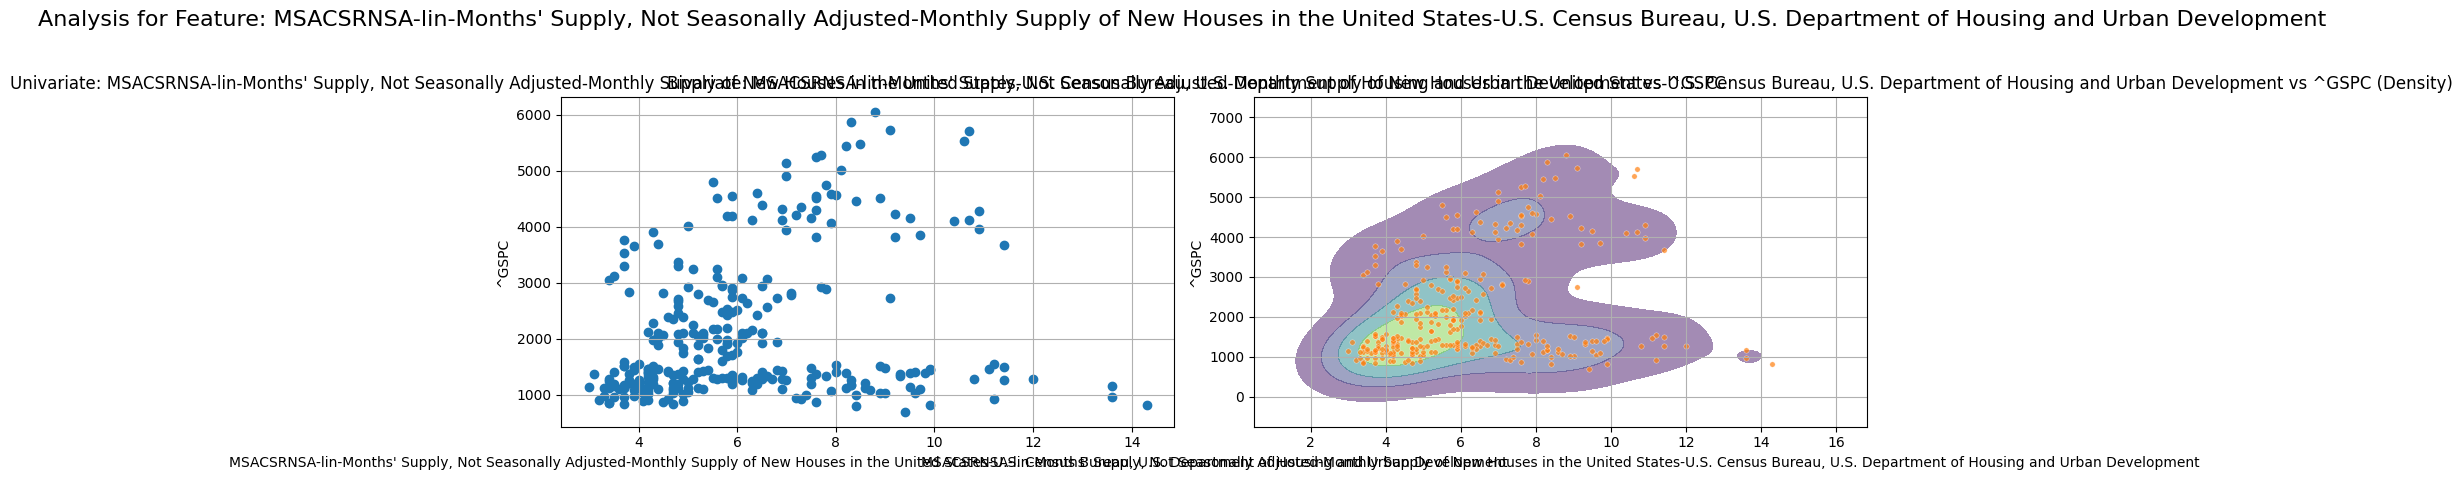

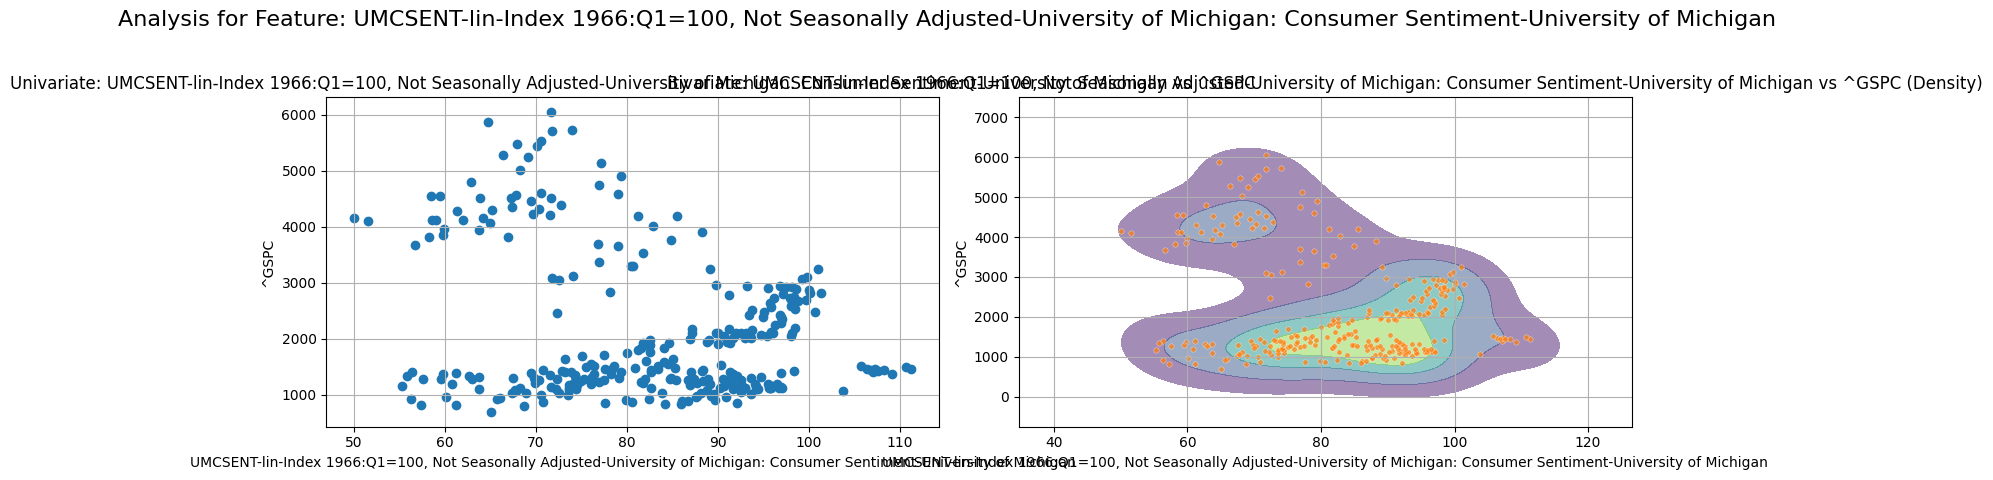

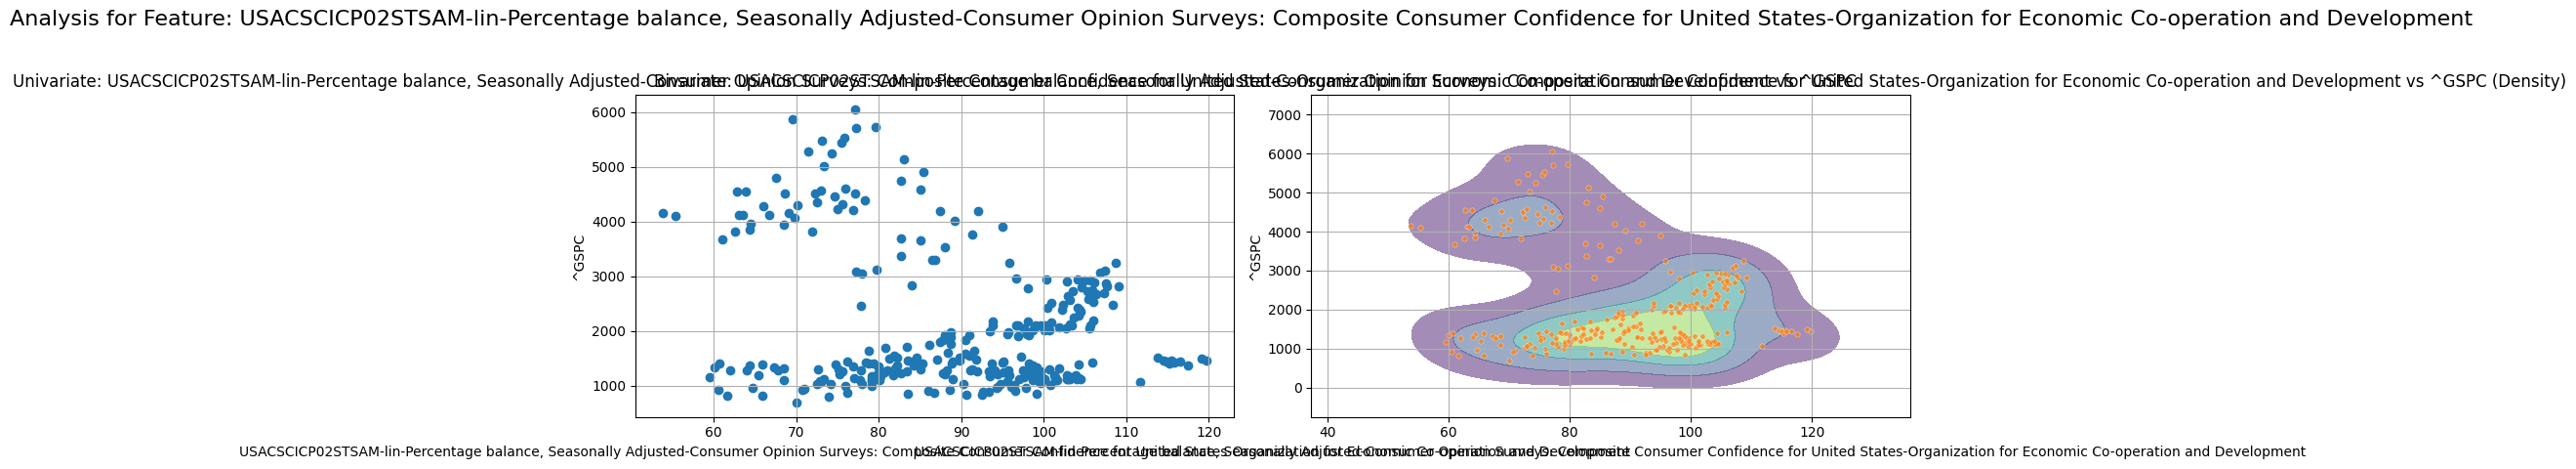

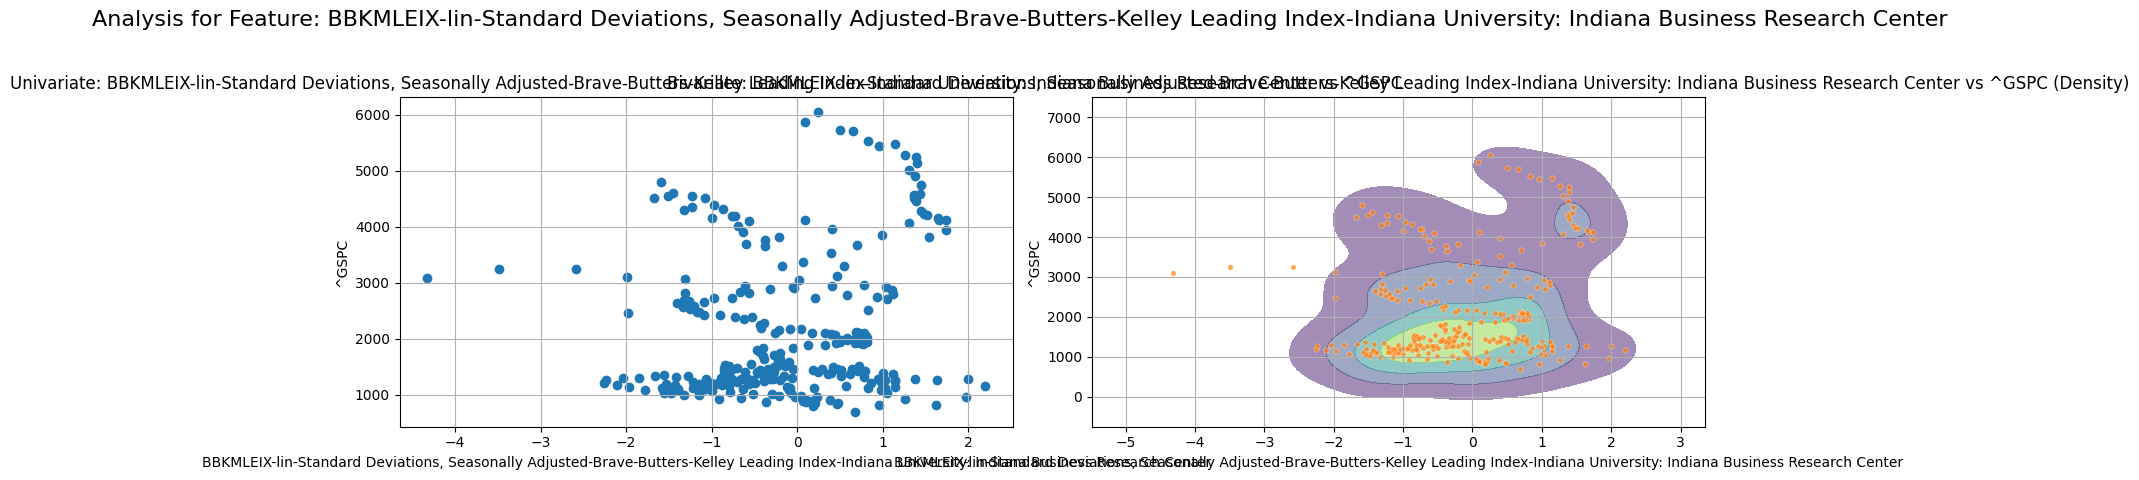

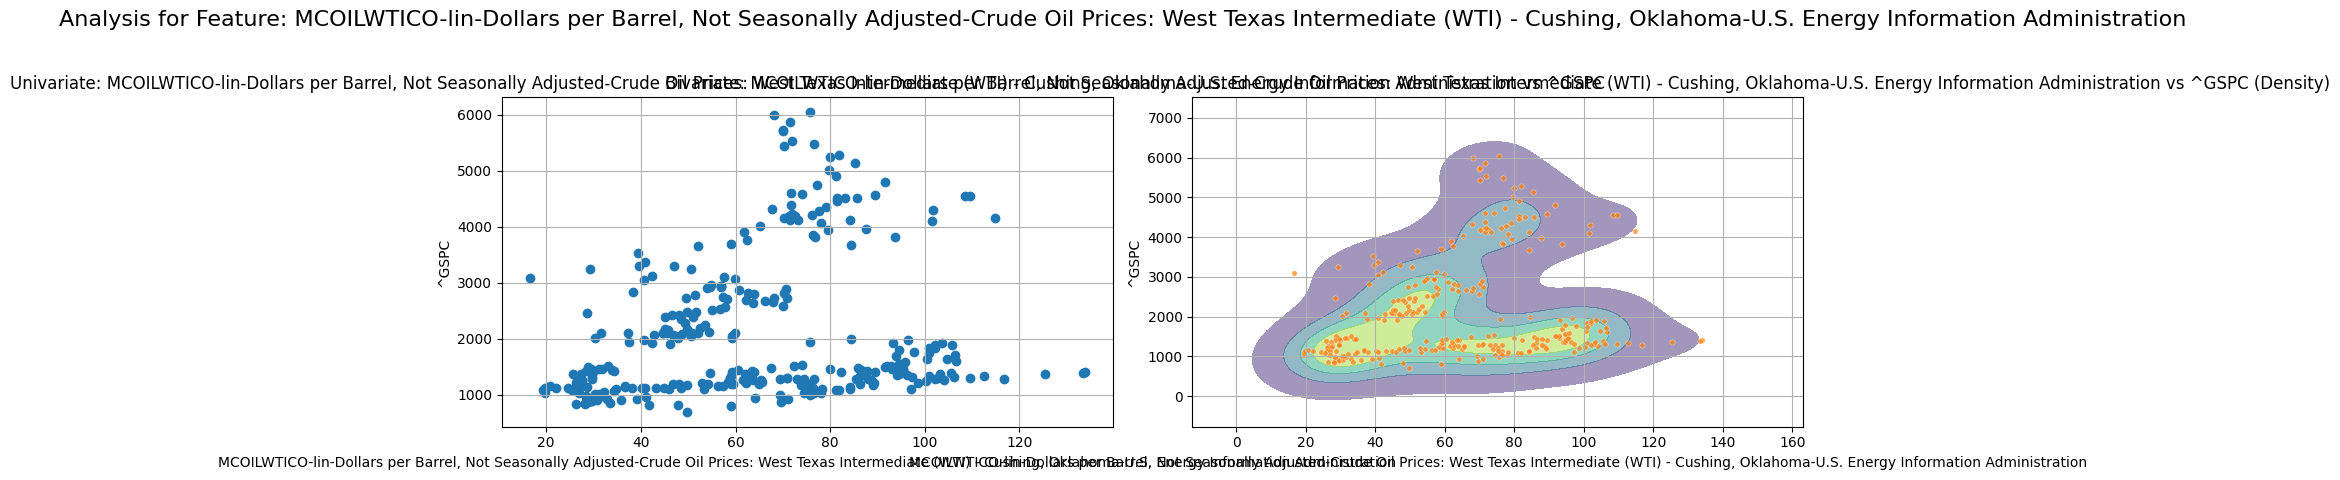

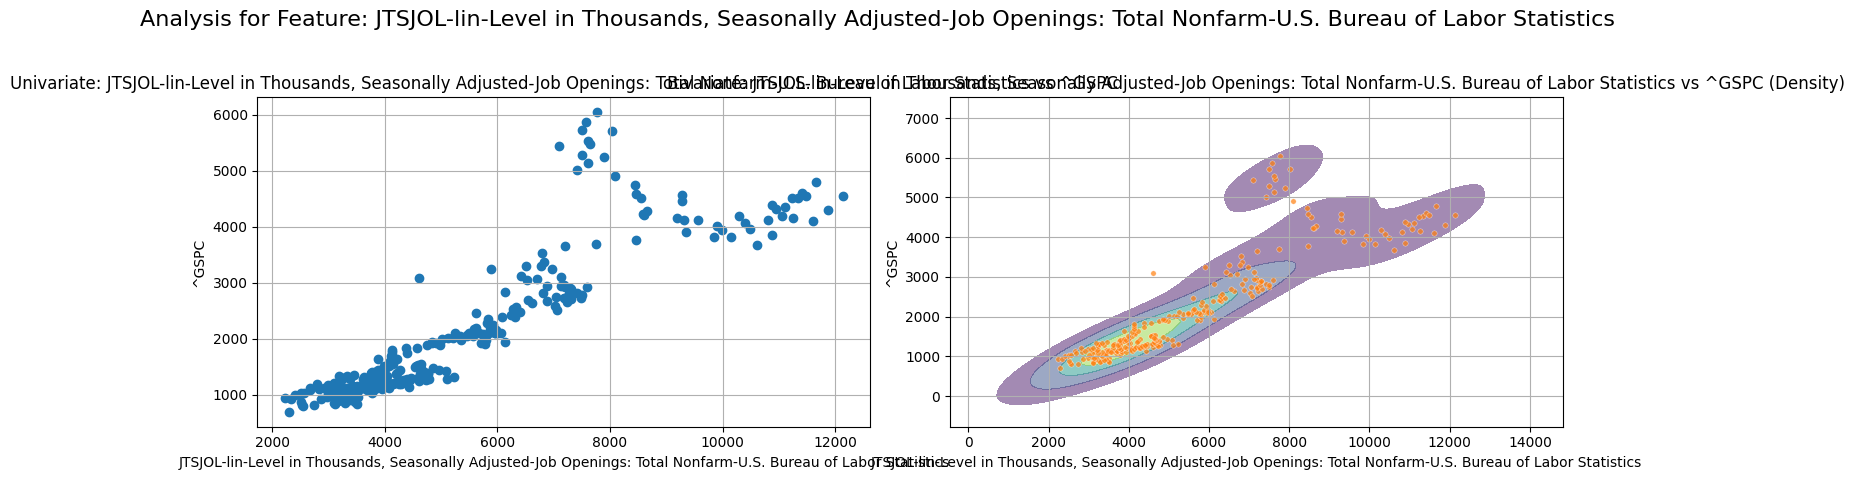

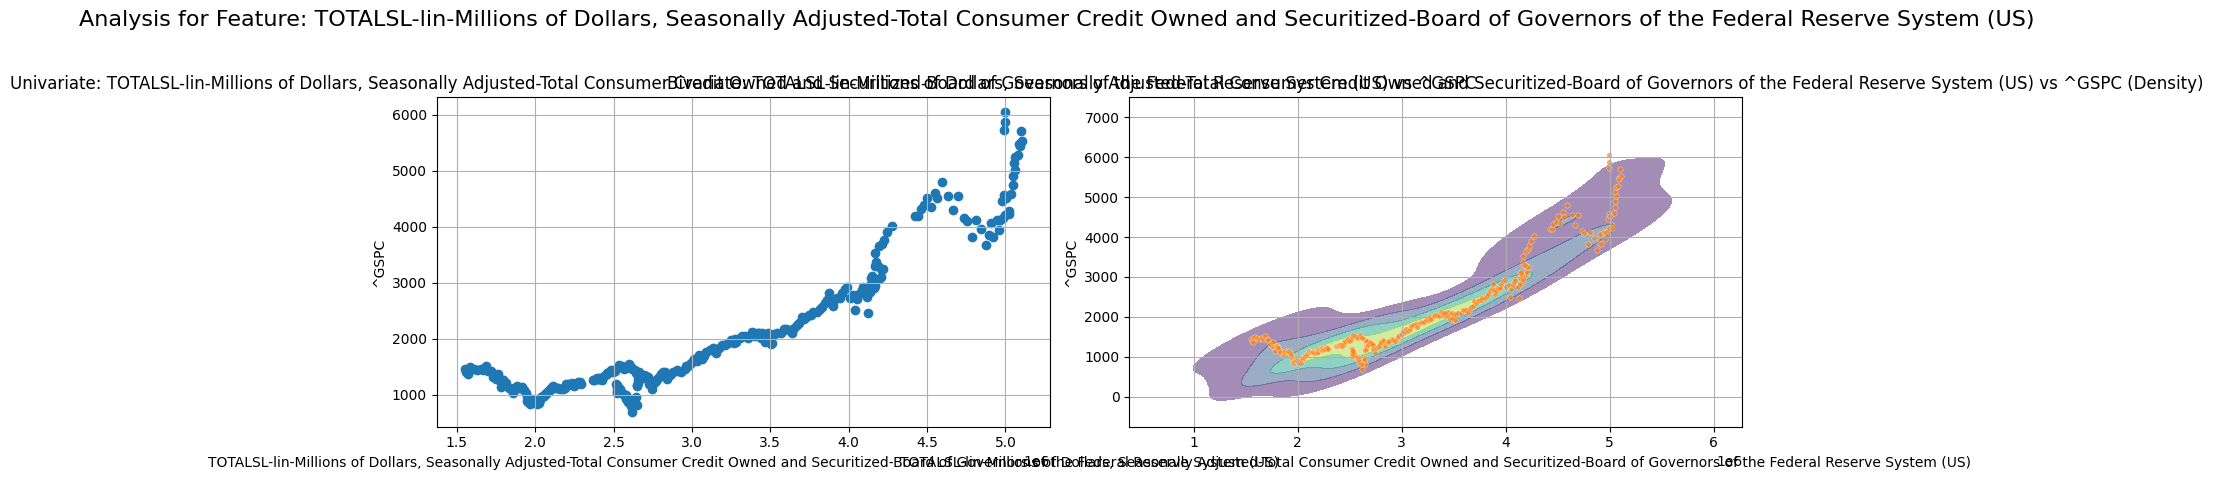

In [152]:
plot_univariate_and_bivariate_side_by_side(df_without_nan_cols, "^GSPC", feature_list)

In [153]:
def cross_corr_mean(df_input, corr_coeff=0.95, plot=0):
	""" The function retuns a list of features to be dropped from the input features.
	
	INPUTS:
	1. df_input: n input features (pandas dataframe)
	2. corr_coeff: Coefficient threshold (absolute value, no negatives) for a pair of variables above which one of the two will be dropped
	3. plot: If set to 1 a plot will be displayed showing a heatmap of the cross-correlation between variables 
	4. savefile: If set to 1, all relevant files will be saved
	
	PLEASE NOTE:
	- The dataframe df_input (should contain only the n input features i.e. no ID and targets) 
	
	SUMMARY OF LOGIC:
	1. The n input variables are taken and a n X n matrix of correlation is created (these are absolute values i.e. a correlation of -0.8 is treated as 0.8)
	2. Variable pairs with correlation higher than the corr_coeff threshold are picked and one of the two variables will be dropped
	3. Which of the two will be dropped is based on the one having lower mean absolute correlation with all other variables 

	SAVED FILES:
	If savefile is set to 1. Saved under current directory under cross_corr_target under folder with a UTC timestamp.
	1. A PDF heatmap representing the cross correlation between all the input features
	2. A CSV of the matrix containing the values used for the heatmap
	3. A CSV of the list of variables to be dropped
	"""
	


	# Generating correlation matrix of input features
	corr_matrix = df_input.corr(method = 'pearson') # For more info on the methods please refer to https://www.kaggle.com/kiyoung1027/correlation-pearson-spearman-and-kendall

	# Plotting cross correlation matrix
	if plot == 1:
		import matplotlib.pyplot as plt
		import seaborn as sns
		plt.figure(figsize=(10,8))
		sns.heatmap(corr_matrix.round(2), cmap=plt.cm.Blues)
		fig = plt.gcf()
		plt.show()

	# Generating correlation with the target
	corr_mean = abs(corr_matrix).mean()

	# Saving fil

	# Preparing data
	features_drop_list = [] # This will contain the list of features to be dropped
	features_index_drop_list = [] # This will contain the index of features to be dropped as per df_input
	corr_matrix = abs(corr_matrix)

	# Selecting features to be dropped (Using two for loops that runs on one triangle of the corr_matrix to avoid checking the correlation of a variable with itself)
	for i in range(corr_matrix.shape[0]):
		for j in range(i+1,corr_matrix.shape[0]):

			# The following if statement checks if each correlation value is higher than threshold (or equal) and also ensures the two columns have NOT been dropped already.  
			if corr_matrix.iloc[i,j]>=corr_coeff and i not in features_index_drop_list and j not in features_index_drop_list:
			
				# The following if statement checks which of the 2 variables with high correlation has a lower correlation with target and then drops it. If equal we can drop any and it drops the first one (This is arbitrary)
				if corr_mean[corr_matrix.columns[i]] >= corr_mean[corr_matrix.columns[j]]:
					features_drop_list.append(corr_matrix.columns[i])	# Name of variable that needs to be dropped appended to list
					features_index_drop_list.append(i)	# Index of variable that needs to be dropped appended to list. This is used to not check for the same variables repeatedly
				else:
					features_drop_list.append(corr_matrix.columns[j])
					features_index_drop_list.append(j)
	


	return features_drop_list

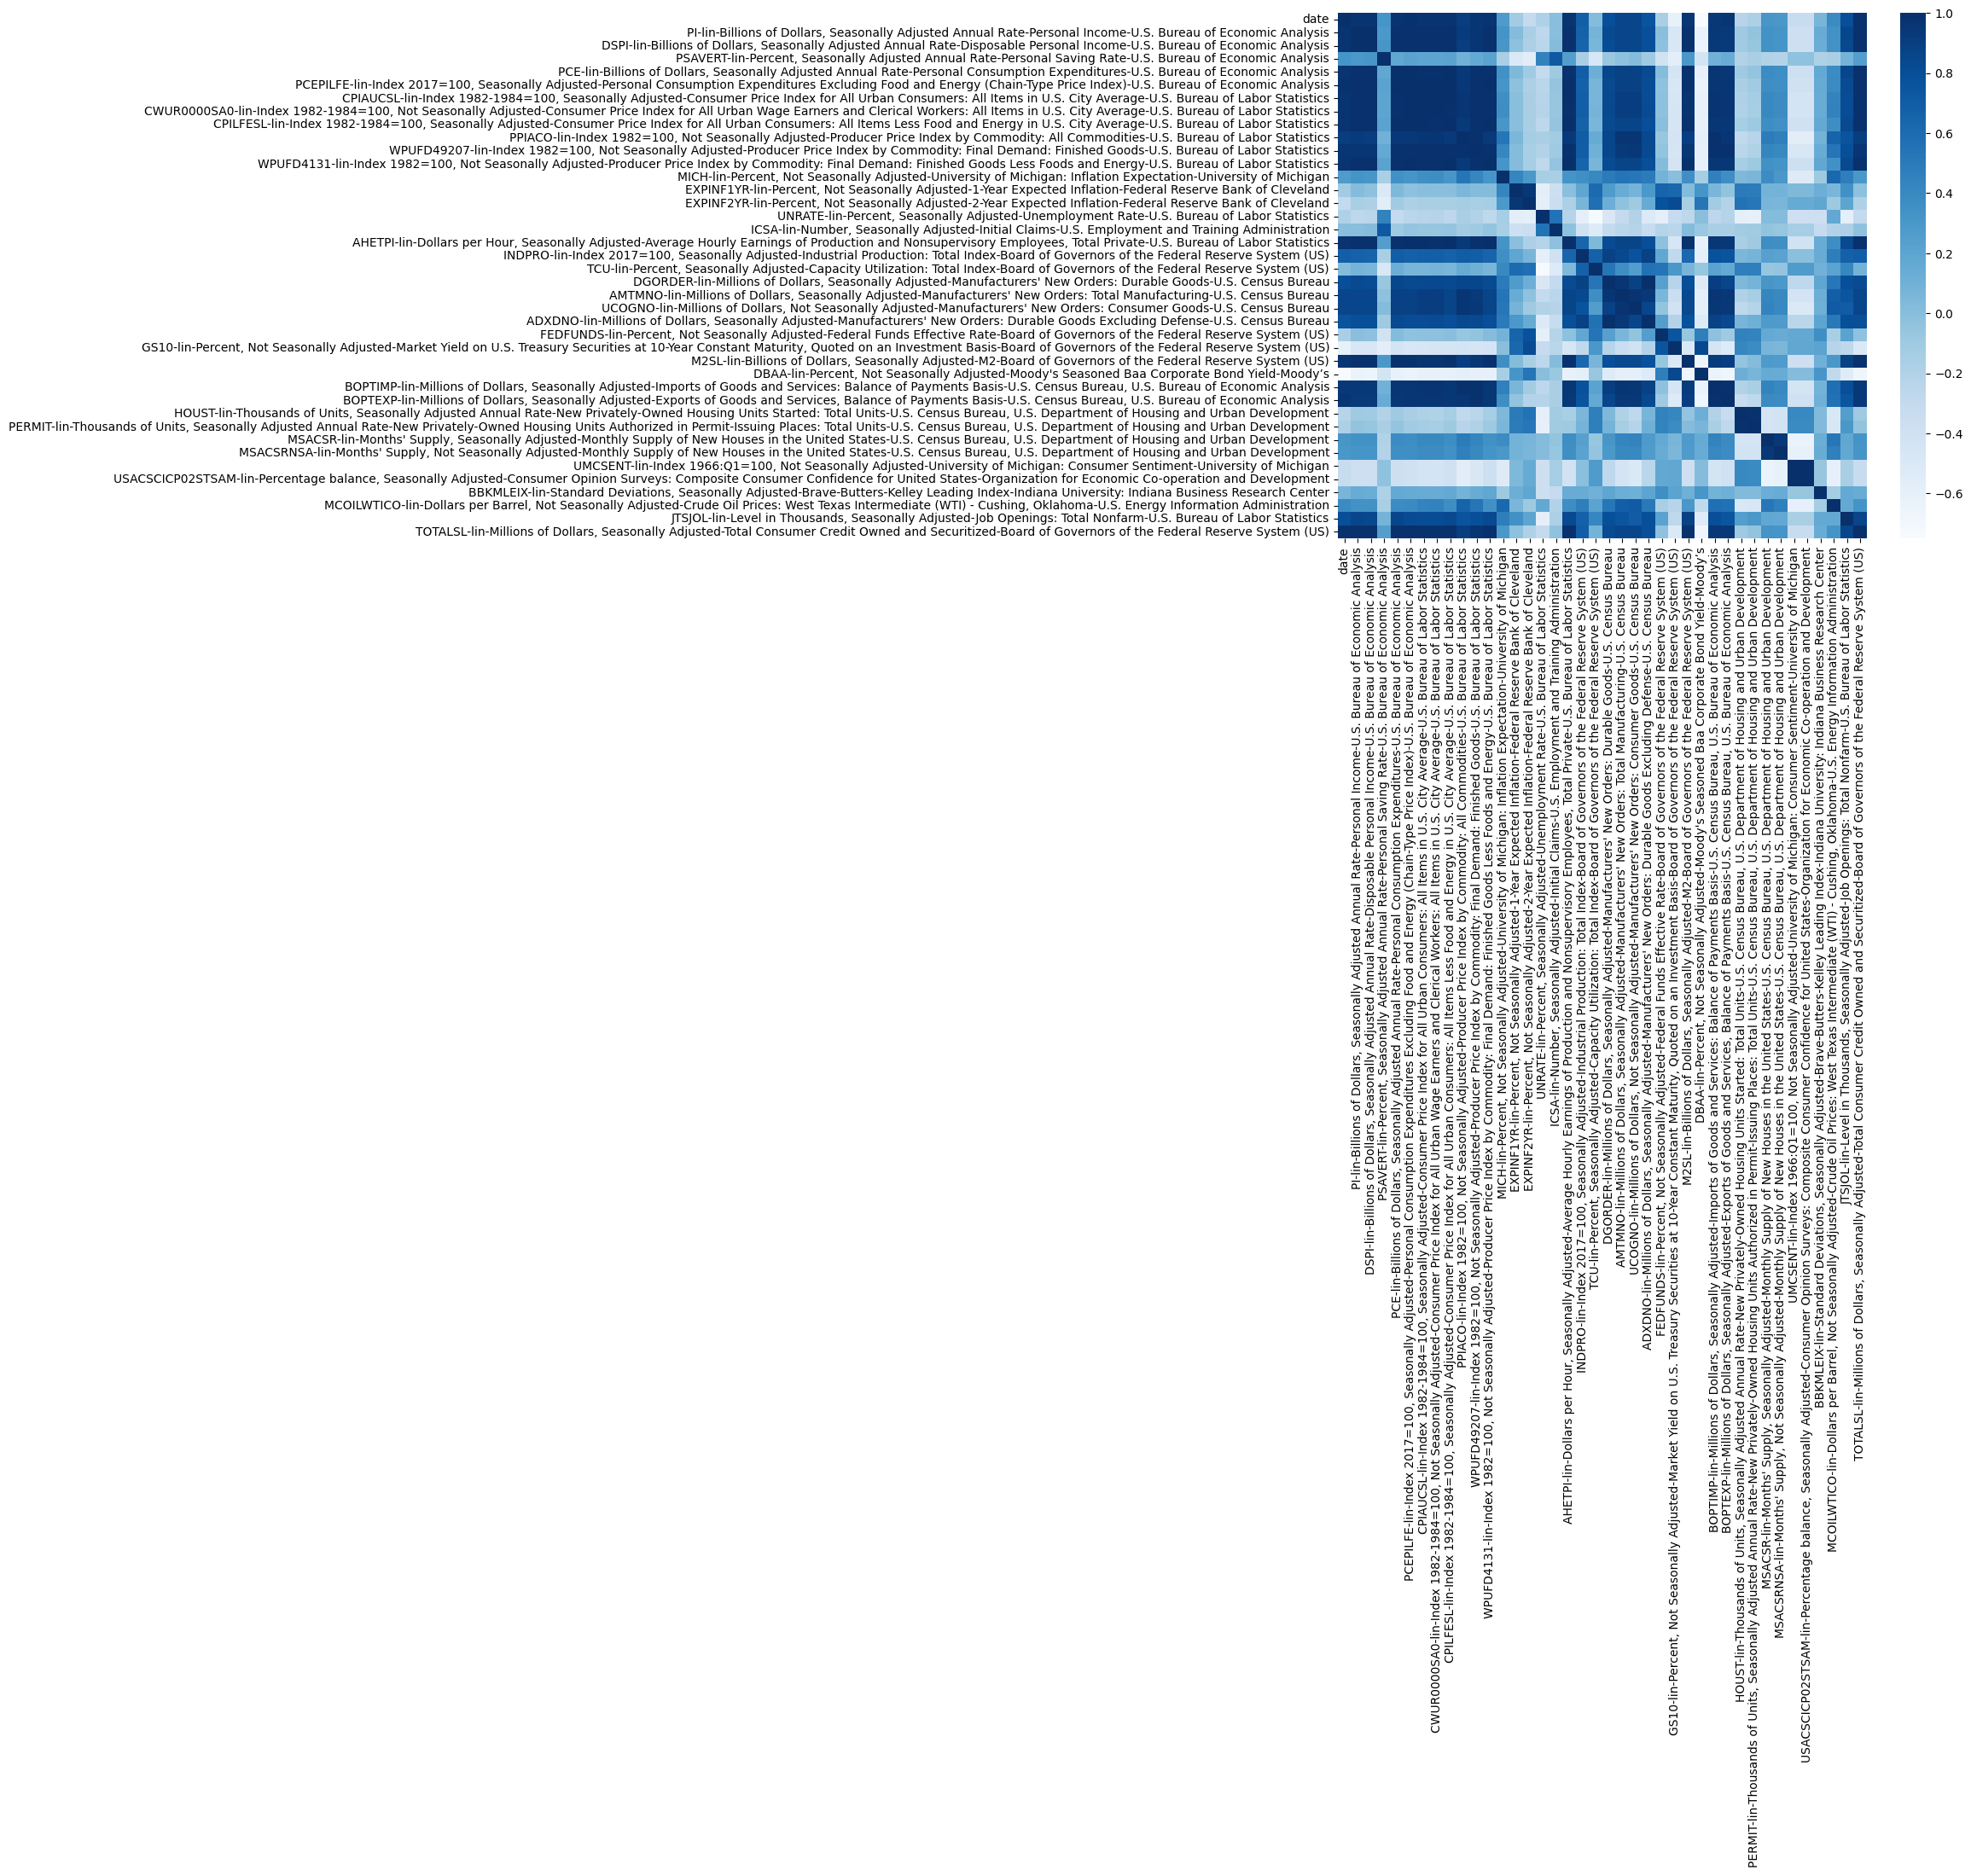

In [154]:
features_to_drop = cross_corr_mean(input, plot=1)
features_to_drop.remove('date')

In [ ]:
print(input.columns)
final_input = input.drop(columns=features_to_drop)
final_input.to_excel("features.xlsx")


Index(['date',
       'PI-lin-Billions of Dollars, Seasonally Adjusted Annual Rate-Personal Income-U.S. Bureau of Economic Analysis',
       'DSPI-lin-Billions of Dollars, Seasonally Adjusted Annual Rate-Disposable Personal Income-U.S. Bureau of Economic Analysis',
       'PSAVERT-lin-Percent, Seasonally Adjusted Annual Rate-Personal Saving Rate-U.S. Bureau of Economic Analysis',
       'PCE-lin-Billions of Dollars, Seasonally Adjusted Annual Rate-Personal Consumption Expenditures-U.S. Bureau of Economic Analysis',
       'PCEPILFE-lin-Index 2017=100, Seasonally Adjusted-Personal Consumption Expenditures Excluding Food and Energy (Chain-Type Price Index)-U.S. Bureau of Economic Analysis',
       'CPIAUCSL-lin-Index 1982-1984=100, Seasonally Adjusted-Consumer Price Index for All Urban Consumers: All Items in U.S. City Average-U.S. Bureau of Labor Statistics',
       'CWUR0000SA0-lin-Index 1982-1984=100, Not Seasonally Adjusted-Consumer Price Index for All Urban Wage Earners and Clerical

In [156]:
target.to_excel("target.xlsx")

In [157]:
target.head

<bound method NDFrame.head of 0      1455.219971
1      1409.280029
2      1379.189941
3      1505.969971
4      1468.250000
          ...     
298    5728.799805
299    6047.149902
300    5868.549805
301    5994.569824
302    5849.720215
Name: ^GSPC, Length: 303, dtype: float64>